In [30]:
# importar paquetes a ocupar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

In [31]:
# importar archivos csv# Abrir el archivo comprimido
with zipfile.ZipFile('datasets/teams/battlelog_teams.zip', 'r') as zip_ref:
    # Extraer el archivo CSV
    zip_ref.extractall('datasets/teams/')

crossBattlelog = pd.read_csv('datasets/teams/battlelog_teams.csv', index_col=0)

os.remove('datasets/teams/battlelog_teams.csv')

crossBattlelog.info()

C:\Users\alniquia\AppData\Local\Temp\ipykernel_14420\2723443249.py:6: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  crossBattlelog = pd.read_csv('datasets/teams/battlelog_teams.csv', index_col=0)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 370116 entries, 0 to 370115
Data columns (total 63 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   battleTime                             370116 non-null  object 
 1   playertag                              370116 non-null  object 
 2   event.id                               370116 non-null  int64  
 3   event.mode                             370116 non-null  object 
 4   event.map                              370116 non-null  object 
 5   battle.mode                            370116 non-null  object 
 6   battle.type                            370116 non-null  object 
 7   battle.result                          370116 non-null  object 
 8   battle.duration                        370116 non-null  float64
 9   battle.trophyChange                    272238 non-null  float64
 10  battle.starPlayer.tag                  308610 non-null  

In [32]:
crossBattlelog['event.map'] = crossBattlelog['event.map'].replace('Belle`s Rock',"Belle's Rock")
crossBattlelog['event.map'].value_counts()

Pinhole Punt        33626
Super Beach         27847
Sneaky Fields       23271
Center Stage        21546
Out in the Open     16180
Beach Ball          16017
Sunny Soccer        13604
Hard Rock Mine      11868
Crystal Arcade      11549
Dueling Beetles     11406
Double Swoosh       10883
Backyard Bowl       10805
Safe Zone           10402
Shooting Star       10086
Ring of Fire        10078
Layer Cake           9435
Open Zone            8866
X Marks the Spot     8143
Belle's Rock         7616
Goldarm Gulch        7574
Pit Stop             7430
Canal Grande         7214
Bridge Too Far       7175
New Perspective      6259
Riverside            5983
Undermine            5920
Minecart Madness     5664
Dry Season           5615
Deep Diner           5565
Split                5225
Tornado Ring         4927
Snaked Assault       4760
Gem Fort             3508
Excel                3104
Hot Potato           2476
Kaboom Canyon        2309
Quarter Pounder      1501
Hideout              1250
Controller C

In [33]:
# importar archivos csv
players = pd.read_csv('datasets/players/players.csv', index_col=0)
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86034 entries, 0 to 86033
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   tag                                   86034 non-null  object 
 1   name                                  86033 non-null  object 
 2   nameColor                             83588 non-null  object 
 3   icon                                  5442 non-null   object 
 4   trophies                              86034 non-null  int64  
 5   highestTrophies                       86034 non-null  int64  
 6   highestPowerPlayPoints                62866 non-null  float64
 7   expLevel                              86034 non-null  int64  
 8   expPoints                             86034 non-null  int64  
 9   isQualifiedFromChampionshipChallenge  86034 non-null  bool   
 10  3vs3Victories                         86034 non-null  int64  
 11  soloVictories  

C:\Users\alniquia\AppData\Local\Temp\ipykernel_14420\611356329.py:2: DtypeWarning: Columns (4,16) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv('datasets/players/players.csv', index_col=0)


In [34]:
# importar archivos csv
brawlers = pd.read_csv('datasets/brawlers/brawlers_stats.csv', index_col=0)
brawlers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 0 to 63
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              64 non-null     int64  
 1   name            64 non-null     object 
 2   starPowers      64 non-null     object 
 3   gadgets         64 non-null     object 
 4   Brawler         64 non-null     object 
 5   Health          64 non-null     float64
 6   Rarity          64 non-null     object 
 7   Class           64 non-null     object 
 8   Movement_Speed  64 non-null     object 
 9   Range           63 non-null     object 
 10  Reload          63 non-null     object 
 11  Speed_Num       64 non-null     int64  
 12  Range_Num       64 non-null     float64
 13  Reload_Num      63 non-null     float64
 14  Role            64 non-null     object 
dtypes: float64(3), int64(2), object(10)
memory usage: 8.0+ KB


In [35]:
# crear columna playerteam
for i in range(len(crossBattlelog)):
	if any(crossBattlelog.loc[i, 'playertag'] == tag for tag in [crossBattlelog.loc[i, 'battle.team1.player1.tag'], crossBattlelog.loc[i, 'battle.team1.player2.tag'], crossBattlelog.loc[i, 'battle.team1.player3.tag']]):
		crossBattlelog.loc[i, 'player_team'] = 'team1'
	elif any(crossBattlelog.loc[i, 'playertag'] == tag for tag in [crossBattlelog.loc[i, 'battle.team2.player1.tag'], crossBattlelog.loc[i, 'battle.team2.player2.tag'], crossBattlelog.loc[i, 'battle.team2.player3.tag']]):
		crossBattlelog.loc[i, 'player_team'] = 'team2'
	else:
		print("error in team assignation for id " + str(i))

crossBattlelog['player_team'].value_counts()

team1    186071
team2    184045
Name: player_team, dtype: int64

In [36]:
# crear columna winner_team
for i, result in enumerate(crossBattlelog['battle.result']):

	player_team = crossBattlelog.loc[i, 'player_team']
	
	if result == 'draw':
		crossBattlelog.loc[i, 'winner_team'] = 'draw'
	elif (player_team == 'team1' and result == 'victory') or (player_team == 'team2' and result == 'defeat'):
		crossBattlelog.loc[i, 'winner_team'] = 'team1'
	elif (player_team == 'team1' and result == 'defeat') or (player_team == 'team2' and result == 'victory'):
		crossBattlelog.loc[i, 'winner_team'] = 'team2'
	else:
		print("error in winner assignation for id " + str(i))

crossBattlelog['winner_team'].value_counts()

team1    186209
team2    181549
draw       2358
Name: winner_team, dtype: int64

In [37]:
# agregar columna identificando batallas low_trophy

def check_low_trophy(val, threshold=250):
	if val < threshold:
		return True
	else:
		return False

crossBattlelog['low_trophy'] = False

cols = ['battle.team1.player1.brawler.trophies', 'battle.team1.player2.brawler.trophies', 'battle.team1.player3.brawler.trophies', 'battle.team2.player1.brawler.trophies', 'battle.team2.player2.brawler.trophies', 'battle.team2.player3.brawler.trophies']

for item in(cols):
	for i, trophies in enumerate(crossBattlelog[item]):
		if crossBattlelog.loc[i, 'low_trophy'] == False:
			crossBattlelog.loc[i, 'low_trophy'] = check_low_trophy(trophies)
	
crossBattlelog = crossBattlelog[crossBattlelog['low_trophy'] == False].reset_index(drop=True)

crossBattlelog['low_trophy'].value_counts()

False    238264
Name: low_trophy, dtype: int64

In [41]:
# format date
# for i, battleTime in enumerate(crossBattlelog['battleTime']):
# 	crossBattlelog.loc[i, 'battleTime'] = pd.to_datetime(battleTime, format='%Y-%m-%d')

crossBattlelog['battleTime'] = pd.to_datetime(crossBattlelog['battleTime'], format='%Y-%m-%d').dt.date

crossBattlelog['battleTime'].value_counts()

2023-01-21    34515
2023-01-23    31468
2023-01-20    26042
2023-01-19    25191
2023-01-24    23131
2023-01-26    21528
2023-01-25    15107
2023-01-22    14352
2023-01-18     5889
2023-01-15     3855
2023-01-02     3758
2023-01-05     3182
2023-01-14     3045
2023-01-16     2926
2023-01-04     2629
2023-01-06     2543
2023-01-09     2517
2023-01-03     2436
2023-01-17     2209
2023-01-13     2158
2023-01-08     2069
2023-01-10     2054
2023-01-07     1605
2023-01-12     1293
2023-01-01     1087
2023-01-11      570
2022-12-31      325
2022-12-30      254
2022-12-29       99
2022-12-27       57
2022-12-13       43
2022-12-22       38
2022-12-26       34
2022-12-28       28
2022-12-23       25
2022-12-25       22
2022-10-15       22
2022-12-16       20
2022-12-19       17
2022-12-20       16
2022-12-24       12
2022-12-21       10
2022-10-28       10
2022-11-01        9
2022-10-30        9
2022-11-11        9
2022-10-26        9
2022-10-10        8
2022-12-10        7
2022-12-11        6


In [42]:
# crear columna winner
def clean_winner(team):

	dfw = crossBattlelog[crossBattlelog['player_team'] == team].reset_index(drop = True)

	for i, winner_team in enumerate(dfw['winner_team']):
		if winner_team == 'draw':
			winner = 'd'
		elif winner_team == team:
			winner = 'y'
		else:
			winner = 'n'
		
		dfw.loc[i, 'winner'] = winner

	dfw = dfw.drop('winner_team', axis=1)

	dfw = dfw.rename(columns={
		'battle.' + team + '.player1.tag': 'battle.player1.tag'
		,'battle.' + team + '.player1.brawler.name': 'battle.player1.brawler.name'
		,'battle.' + team + '.player1.brawler.power': 'battle.player1.brawler.power'
		,'battle.' + team + '.player1.brawler.trophies': 'battle.player1.brawler.trophies'
		,'battle.' + team + '.player2.tag': 'battle.player2.tag'
		,'battle.' + team + '.player2.brawler.name': 'battle.player2.brawler.name'
		,'battle.' + team + '.player2.brawler.power': 'battle.player2.brawler.power'
		,'battle.' + team + '.player2.brawler.trophies': 'battle.player2.brawler.trophies'
		,'battle.' + team + '.player3.tag': 'battle.player3.tag'
		,'battle.' + team + '.player3.brawler.name': 'battle.player3.brawler.name'
		,'battle.' + team + '.player3.brawler.power': 'battle.player3.brawler.power'
		,'battle.' + team + '.player3.brawler.trophies': 'battle.player3.brawler.trophies'
	})

	dfw = dfw[[	
		'battleTime'
		,'event.mode'
		,'event.map'
		,'battle.type'
		,'battle.duration'
		,'battle.trophyChange'
		,'battle.starPlayer.tag'
 		,'battle.starPlayer.brawler.name'
 		,'battle.starPlayer.brawler.power'
 		,'battle.starPlayer.brawler.trophies'
		,'battle.player1.tag'
		,'battle.player1.brawler.name'
		,'battle.player1.brawler.power'
		,'battle.player1.brawler.trophies'
		,'battle.player2.tag'
		,'battle.player2.brawler.name'
		,'battle.player2.brawler.power'
		,'battle.player2.brawler.trophies'
		,'battle.player3.tag'
		,'battle.player3.brawler.name'
		,'battle.player3.brawler.power'
		,'battle.player3.brawler.trophies'
		,'winner'
	]]

	if team == 'team1':
		oteam = 'team2'
	else:
		oteam = 'team1'
	
	dfl = crossBattlelog[crossBattlelog['player_team'] == team].reset_index(drop = True)

	for i, winner_team in enumerate(dfl['winner_team']):
		if winner_team == 'draw':
			winner = 'd'
		elif winner_team == oteam:
			winner = 'y'
		else:
			winner = 'n'
		
		dfl.loc[i, 'winner'] = winner

	dfl = dfl.drop('winner_team', axis=1)

	dfl = dfl.rename(columns={
		'battle.' + oteam + '.player1.tag': 'battle.player1.tag'
		,'battle.' + oteam + '.player1.brawler.name': 'battle.player1.brawler.name'
		,'battle.' + oteam + '.player1.brawler.power': 'battle.player1.brawler.power'
		,'battle.' + oteam + '.player1.brawler.trophies': 'battle.player1.brawler.trophies'
		,'battle.' + oteam + '.player2.tag': 'battle.player2.tag'
		,'battle.' + oteam + '.player2.brawler.name': 'battle.player2.brawler.name'
		,'battle.' + oteam + '.player2.brawler.power': 'battle.player2.brawler.power'
		,'battle.' + oteam + '.player2.brawler.trophies': 'battle.player2.brawler.trophies'
		,'battle.' + oteam + '.player3.tag': 'battle.player3.tag'
		,'battle.' + oteam + '.player3.brawler.name': 'battle.player3.brawler.name'
		,'battle.' + oteam + '.player3.brawler.power': 'battle.player3.brawler.power'
		,'battle.' + oteam + '.player3.brawler.trophies': 'battle.player3.brawler.trophies'
	})

	dfl = dfl[[	
		'battleTime'
		,'event.mode'
		,'event.map'
		,'battle.type'
		,'battle.duration'
		,'battle.trophyChange'
		,'battle.starPlayer.tag'
 		,'battle.starPlayer.brawler.name'
 		,'battle.starPlayer.brawler.power'
 		,'battle.starPlayer.brawler.trophies'
		,'battle.player1.tag'
		,'battle.player1.brawler.name'
		,'battle.player1.brawler.power'
		,'battle.player1.brawler.trophies'
		,'battle.player2.tag'
		,'battle.player2.brawler.name'
		,'battle.player2.brawler.power'
		,'battle.player2.brawler.trophies'
		,'battle.player3.tag'
		,'battle.player3.brawler.name'
		,'battle.player3.brawler.power'
		,'battle.player3.brawler.trophies'
		,'winner'
	]]

	return pd.concat([dfw, dfl], ignore_index=True)

team1 = clean_winner('team1')
team2 = clean_winner('team2')

battlelogProcess = pd.concat([team1, team2], ignore_index=True).reset_index(drop = True)
battlelogProcess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476528 entries, 0 to 476527
Data columns (total 23 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   battleTime                          476528 non-null  object 
 1   event.mode                          476528 non-null  object 
 2   event.map                           476528 non-null  object 
 3   battle.type                         476528 non-null  object 
 4   battle.duration                     476528 non-null  float64
 5   battle.trophyChange                 472756 non-null  float64
 6   battle.starPlayer.tag               476526 non-null  object 
 7   battle.starPlayer.brawler.name      476526 non-null  object 
 8   battle.starPlayer.brawler.power     476526 non-null  float64
 9   battle.starPlayer.brawler.trophies  476526 non-null  float64
 10  battle.player1.tag                  476528 non-null  object 
 11  battle.player1.brawler.nam

In [43]:
# agregar brawler stats
def add_brawlers(df, prefix):
	df = pd.merge(left=df, right=brawlers.add_prefix(prefix), on=prefix + 'name', how='left', suffixes=('','_b'))
	return df

battlelogProcess = add_brawlers(battlelogProcess, 'battle.player1.brawler.')
battlelogProcess = add_brawlers(battlelogProcess, 'battle.player2.brawler.')
battlelogProcess = add_brawlers(battlelogProcess, 'battle.player3.brawler.')

battlelogProcess.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476528 entries, 0 to 476527
Data columns (total 65 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   battleTime                             476528 non-null  object 
 1   event.mode                             476528 non-null  object 
 2   event.map                              476528 non-null  object 
 3   battle.type                            476528 non-null  object 
 4   battle.duration                        476528 non-null  float64
 5   battle.trophyChange                    472756 non-null  float64
 6   battle.starPlayer.tag                  476526 non-null  object 
 7   battle.starPlayer.brawler.name         476526 non-null  object 
 8   battle.starPlayer.brawler.power        476526 non-null  float64
 9   battle.starPlayer.brawler.trophies     476526 non-null  float64
 10  battle.player1.tag                     476528 non-null  

In [44]:
# unificar bases de brawlers
bk1 = battlelogProcess.rename(columns={'battle.player1.brawler.name': 'brawlername'})
bk2 = battlelogProcess.rename(columns={'battle.player2.brawler.name': 'brawlername'})
bk3 = battlelogProcess.rename(columns={'battle.player3.brawler.name': 'brawlername'})

brawler = pd.concat([
bk1[['event.mode','event.map','battle.type','brawlername','winner']], 
bk2[['event.mode','event.map','battle.type','brawlername','winner']], 
bk3[['event.mode','event.map','battle.type','brawlername','winner']]
], ignore_index=True)

brawler

event.mode        event.map battle.type brawlername winner
0           bounty     Temple Ruins      ranked       MANDY      n
1           bounty     Temple Ruins      ranked         BEA      y
2           bounty     Temple Ruins      ranked         BEA      n
3         knockout        Riverside      ranked        NANI      n
4         knockout        Riverside      ranked        NANI      y
...            ...              ...         ...         ...    ...
1429579      heist   Bridge Too Far      ranked       AMBER      n
1429580    hotZone  Quarter Pounder      ranked        BULL      n
1429581    gemGrab    Double Swoosh      ranked         ASH      y
1429582    hotZone  Quarter Pounder      ranked         BEA      n
1429583    gemGrab    Double Swoosh      ranked       BROCK      n

[1429584 rows x 5 columns]

In [45]:
brawler['winner'].value_counts()

n    709629
y    709629
d     10326
Name: winner, dtype: int64

In [46]:
# crear pivot tables
pivot_brawler = brawler.pivot_table(index=['brawlername','event.mode','event.map'], columns='winner', values='winner', aggfunc='size', fill_value=0).reset_index(drop=False)
pivot_brawler

winner brawlername event.mode         event.map  d     n    y
0            8-BIT     bounty      Canal Grande  0     4    0
1            8-BIT     bounty        Dry Season  0    58   72
2            8-BIT     bounty             Excel  0    13   17
3            8-BIT     bounty           Hideout  0     6    3
4            8-BIT     bounty        Layer Cake  0    12   11
...            ...        ...               ... ..   ...  ...
2676          TICK   knockout     Goldarm Gulch  0    98   78
2677          TICK   knockout   New Perspective  1   564  410
2678          TICK   knockout   Out in the Open  1   929  749
2679          TICK   knockout         Riverside  0   454  303
2680          TICK   knockout  X Marks the Spot  2  1010  735

[2681 rows x 6 columns]

In [47]:
# agregar columna totales, win y draw

pivot_brawler['total_games'] = pivot_brawler['d'] + pivot_brawler['n'] + pivot_brawler['y']
pivot_brawler['winrate'] = pivot_brawler['y'] / pivot_brawler['total_games']

total_games_per_map = pivot_brawler[['event.mode','event.map','total_games']].groupby(['event.mode','event.map']).sum()

pivot_brawler = pivot_brawler.merge(total_games_per_map, on=['event.mode','event.map'], suffixes=('', '_map'))

pivot_brawler['userate'] = pivot_brawler['total_games'] / pivot_brawler['total_games_map']

pivot_brawler = pivot_brawler.sort_values(by=['brawlername','event.mode','event.map'], ascending=False).reset_index(drop=True)

pivot_brawler

winner brawlername event.mode         event.map  d     n    y  total_games  \
0             TICK   knockout  X Marks the Spot  2  1010  735         1747   
1             TICK   knockout         Riverside  0   454  303          757   
2             TICK   knockout   Out in the Open  1   929  749         1679   
3             TICK   knockout   New Perspective  1   564  410          975   
4             TICK   knockout     Goldarm Gulch  0    98   78          176   
...            ...        ...               ... ..   ...  ...          ...   
2676         8-BIT     bounty        Layer Cake  0    12   11           23   
2677         8-BIT     bounty           Hideout  0     6    3            9   
2678         8-BIT     bounty             Excel  0    13   17           30   
2679         8-BIT     bounty        Dry Season  0    58   72          130   
2680         8-BIT     bounty      Canal Grande  0     4    0            4   

winner   winrate  total_games_map   userate  
0       0.420721            43602  0.040067  
1       0.400264            31848  0.023769  
2       0.446099            51246  0.032764  
3       0.420513            32994  0.029551  
4       0.443182             6720  0.026190  
...          ...              ...       ...  
2676    0.478261            19848  0.001159  
2677    0.333333             6948  0.001295  
2678    0.566667            17316  0.001733  
2679    0.553846            29460  0.004413  
2680    0.000000             2184  0.001832  

[2681 rows x 10 columns]

In [48]:
# export brawler_by_event_map
pivot_brawler.to_csv('datasets/teams/brawler_by_event_map.csv')

In [49]:
# función que crea distribución por gamemode
def dist_gamemode(gamemode):
	df = pivot_brawler[(pivot_brawler['event.mode']==gamemode)].groupby(['brawlername','event.mode']).sum(['d', 'n', 'y', 'total_games', 'total_games_map']).sort_values(by=['winrate'], ascending=False).reset_index()
	df['winrate'] = df['y'] / df['total_games']
	df['userate'] = df['total_games'] / df['total_games_map']
	return df

# función que crea distribución por brawler general
def dist_brawler_g():
	df = pivot_brawler.groupby(['brawlername']).sum(['d', 'n', 'y', 'total_games', 'total_games_map']).sort_values(by=['winrate'], ascending=False).reset_index()
	df['winrate'] = df['y'] / df['total_games']
	df['userate'] = df['total_games'] / df['total_games_map']
	return df

#función que crea distribución por brawler
def dist_brawler(brawler):
	df = pivot_brawler[(pivot_brawler['brawlername']==brawler)].groupby(['event.mode']).sum(['d', 'n', 'y', 'total_games', 'total_games_map']).sort_values(by=['winrate'], ascending=False).reset_index()
	df['winrate'] = df['y'] / df['total_games']
	df['userate'] = df['total_games'] / df['total_games_map']
	return df

#función que crea distribución por gamemode y map
def dist_gamemode_map(gamemode, map):
	df = pivot_brawler[(pivot_brawler['event.mode']==gamemode) & (pivot_brawler['event.map']==map)].groupby(['brawlername']).sum(['d', 'n', 'y', 'total_games', 'total_games_map']).sort_values(by=['winrate'], ascending=False).reset_index()
	df['winrate'] = df['y'] / df['total_games']
	df['userate'] = df['total_games'] / df['total_games_map']
	return df

In [50]:
# definir estilo de plot
print(plt.style.available)
plt.style.use('seaborn-v0_8-dark-palette')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [51]:
#estilo sns
print(sns.axes_style())
sns.set_theme('paper')

{'axes.facecolor': 'white', 'axes.edgecolor': 'black', 'axes.grid': False, 'axes.axisbelow': 'line', 'axes.labelcolor': 'black', 'figure.facecolor': 'white', 'grid.color': '#b0b0b0', 'grid.linestyle': '-', 'text.color': 'black', 'xtick.color': 'black', 'ytick.color': 'black', 'xtick.direction': 'out', 'ytick.direction': 'out', 'lines.solid_capstyle': <CapStyle.projecting: 'projecting'>, 'patch.edgecolor': 'black', 'patch.force_edgecolor': False, 'image.cmap': 'viridis', 'font.family': ['sans-serif'], 'font.sans-serif': ['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif'], 'xtick.bottom': True, 'xtick.top': False, 'ytick.left': True, 'ytick.right': False, 'axes.spines.left': True, 'axes.spines.bottom': True, 'axes.spines.right': True, 'axes.spines.top': True}


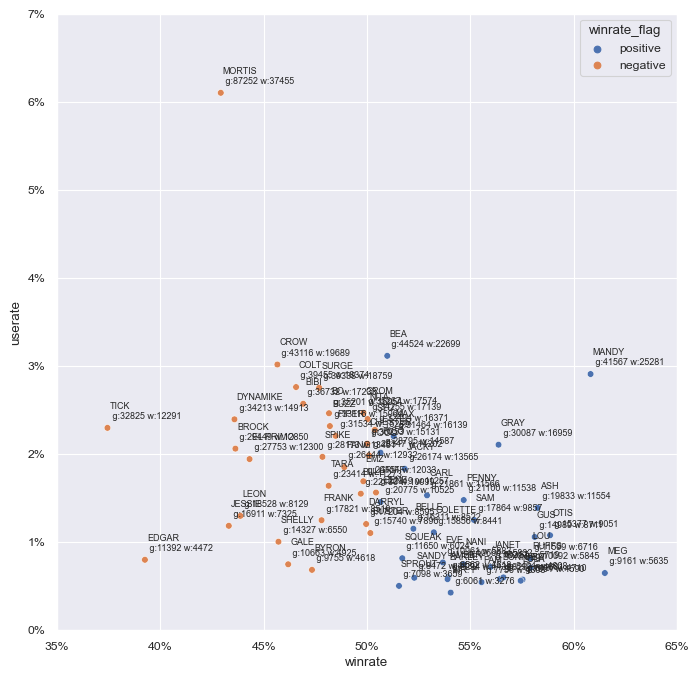

In [52]:
# winrate / userate overall

gamemode = dist_brawler_g()

gamemode['percentile_wr'] = gamemode['winrate'] / gamemode['winrate'].quantile(0.5)
gamemode['winrate_flag'] = np.where(gamemode['percentile_wr'] > 1,'positive','negative')

fig, ax = plt.subplots(figsize=(8,8))

sns.scatterplot(
	data=gamemode
	,x="winrate"
	,y="userate"
	,hue='winrate_flag'
	,ax=ax
)

# Añadir etiquetas flotando sobre los puntos
for i, point in gamemode.iterrows():
		ax.text(point.winrate + 0.001, point.userate + 0.001, point.brawlername + '\n g:' + str(point.total_games) + ' w:' + str(point.y), fontsize=6.5)

yticks = ax.get_yticks()
xticks = ax.get_xticks()

ax.set_yticks(yticks)
ax.set_xticks(xticks)

ax.set_yticklabels(["{:,.00%}".format(y) for y in yticks])
ax.set_xticklabels(["{:,.00%}".format(x) for x in xticks])

plt.show()

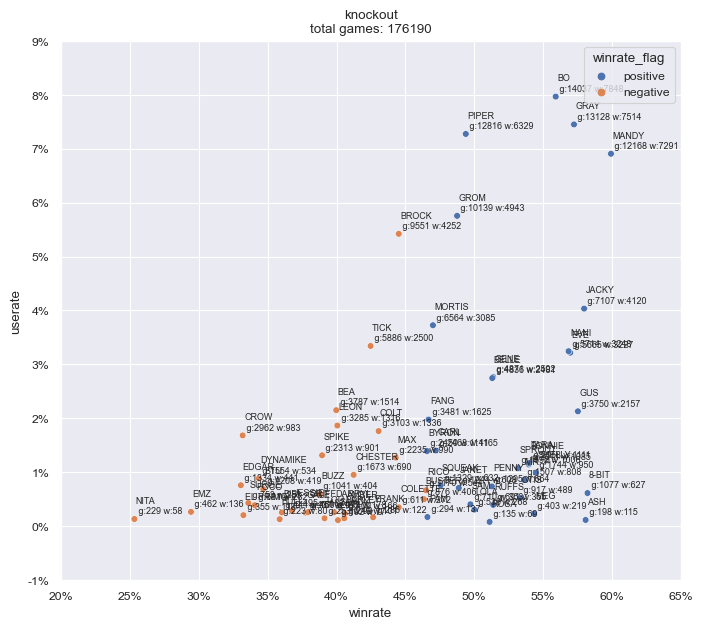

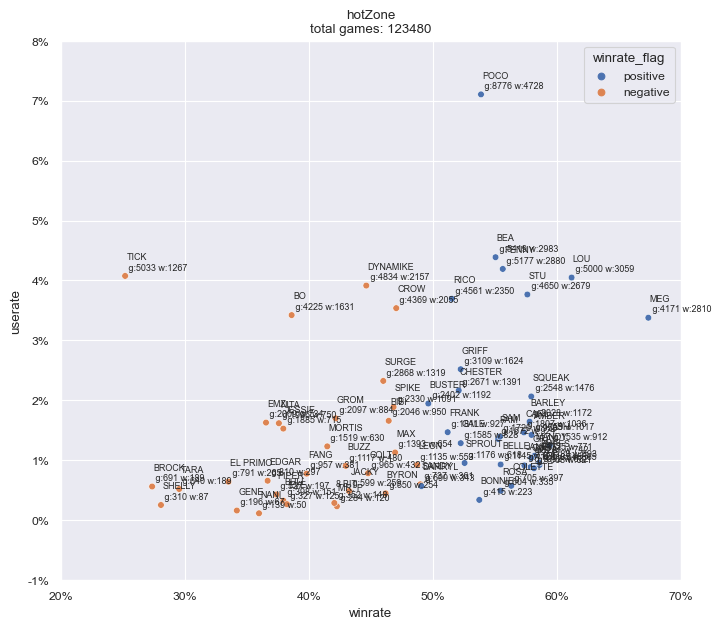

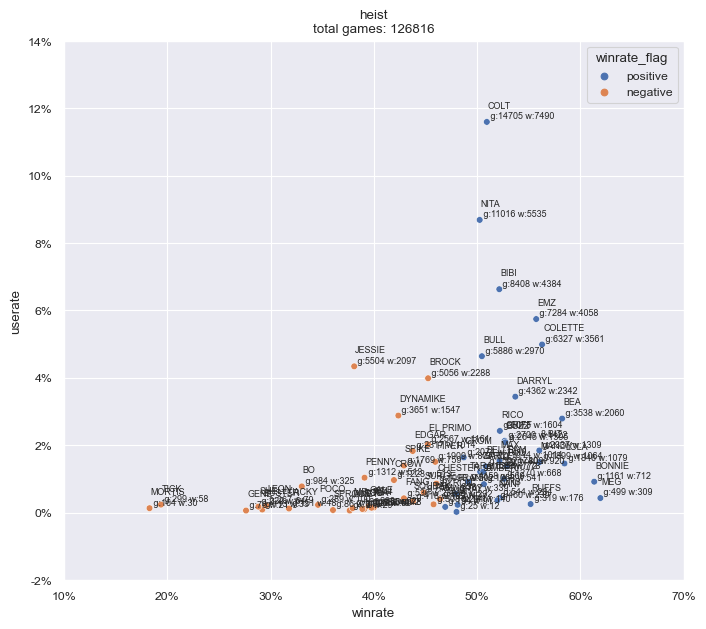

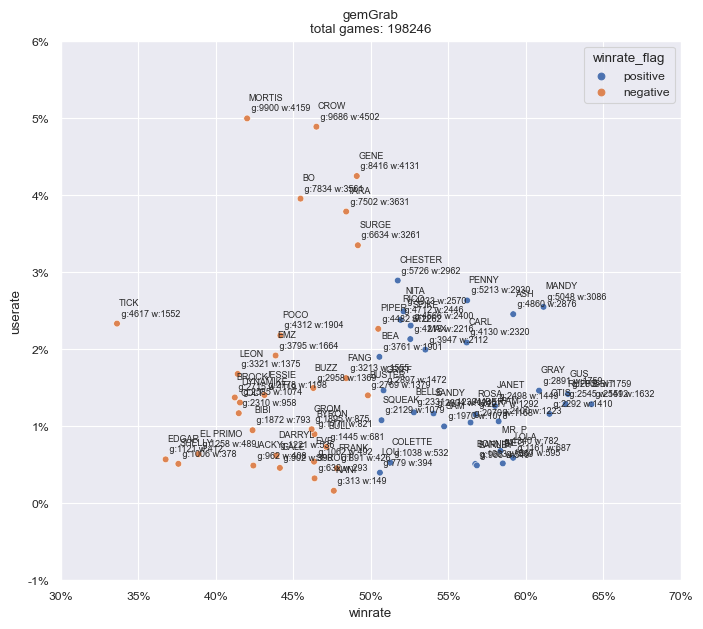

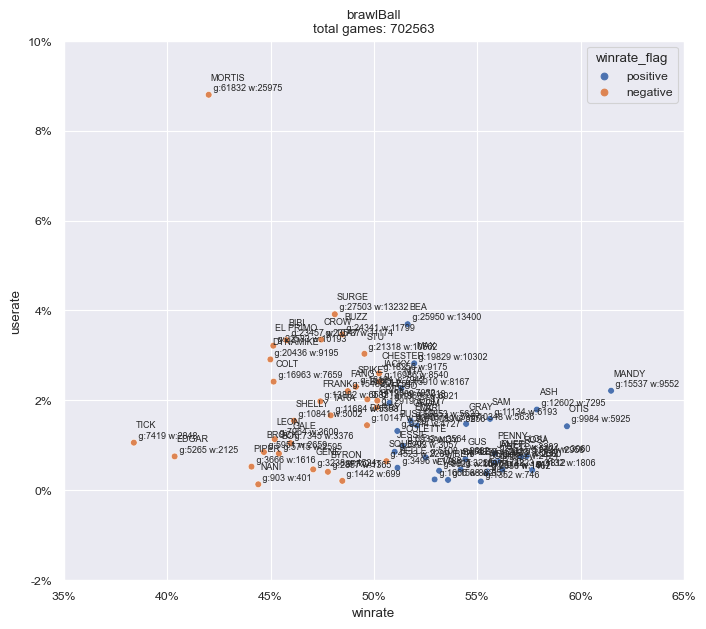

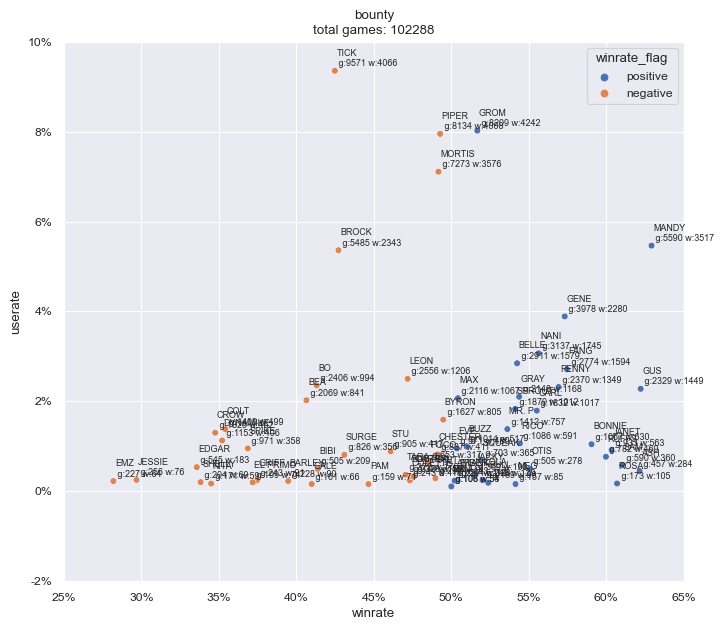

In [59]:
# winrate / userate
gamemodes = pivot_brawler['event.mode'].drop_duplicates().tolist()

for i, gm in enumerate(gamemodes):
    data = dist_gamemode(gm)

    data['percentile_wr'] = data['winrate'] / data['winrate'].quantile(0.5)
    data['winrate_flag'] = np.where(data['percentile_wr'] > 1,'positive','negative')

    fig, ax = plt.subplots(figsize=(8,7))

    sns.scatterplot(
        data=data
        ,x="winrate"
        ,y="userate"
        ,hue='winrate_flag'
        ,ax=ax
    )

    # Añadir etiquetas flotando sobre los puntos
    for i, point in data.iterrows():
        ax.text(point.winrate + 0.001, point.userate + 0.001, point.brawlername + '\n g:' + str(point.total_games) + ' w:' + str(point.y), fontsize=6.5)

    yticks = ax.get_yticks()
    xticks = ax.get_xticks()

    ax.set_yticks(yticks)
    ax.set_xticks(xticks)

    ax.set_yticklabels(["{:,.00%}".format(y) for y in yticks])
    ax.set_xticklabels(["{:,.00%}".format(x) for x in xticks])
    
    plt.title(str(data['event.mode'][0]) + '\n' + 'total games: ' + str(data['total_games_map'][0]))

    plt.savefig('plots/gamemode/' + gm + '.png', dpi=300, bbox_inches='tight')

    plt.show()

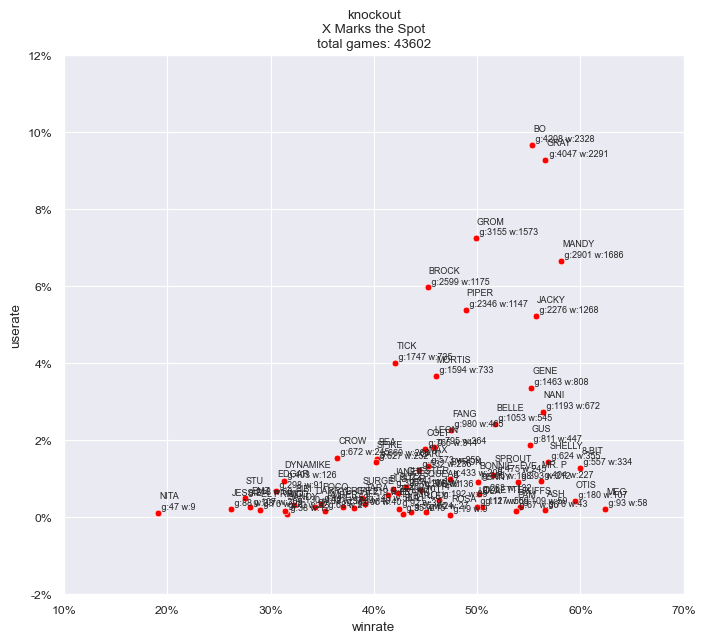

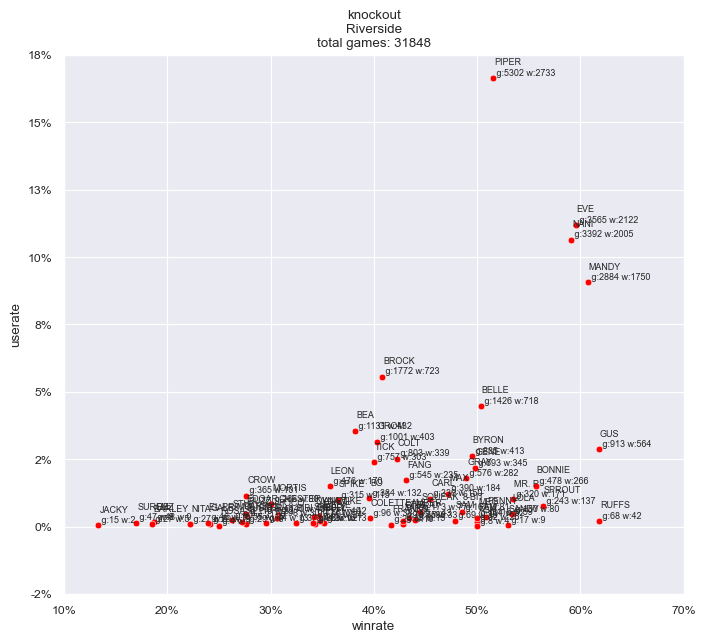

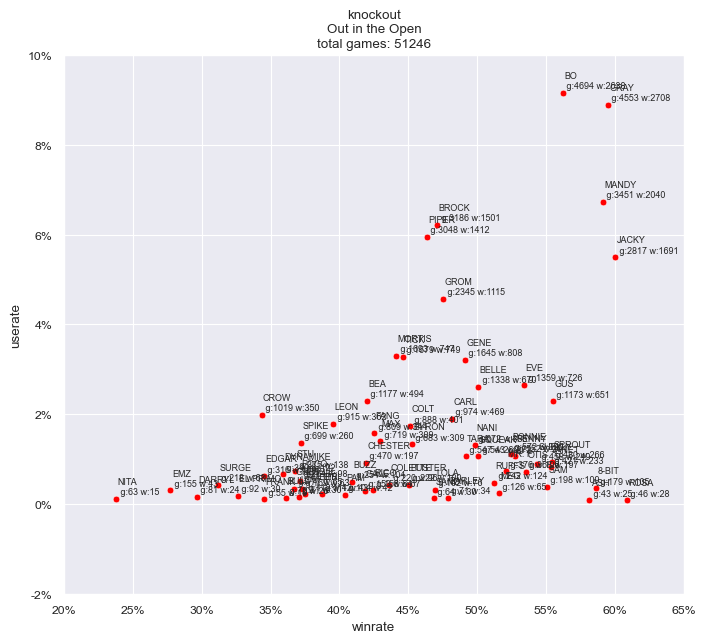

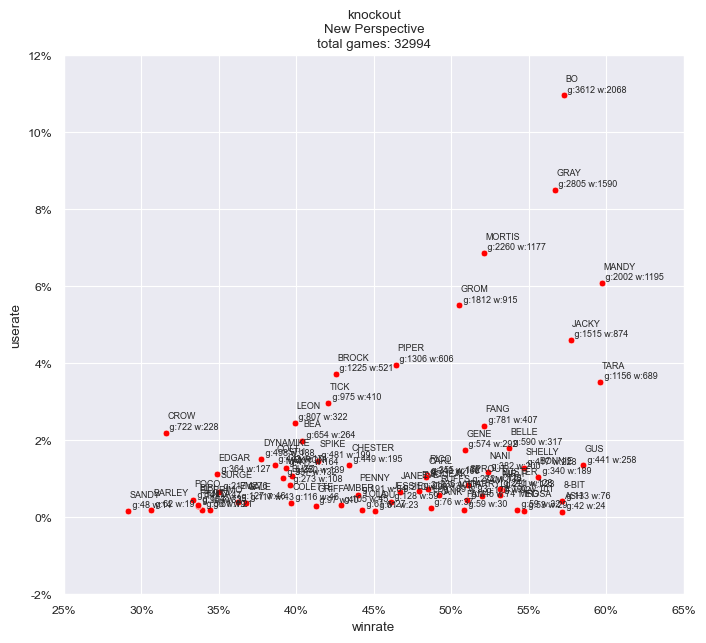

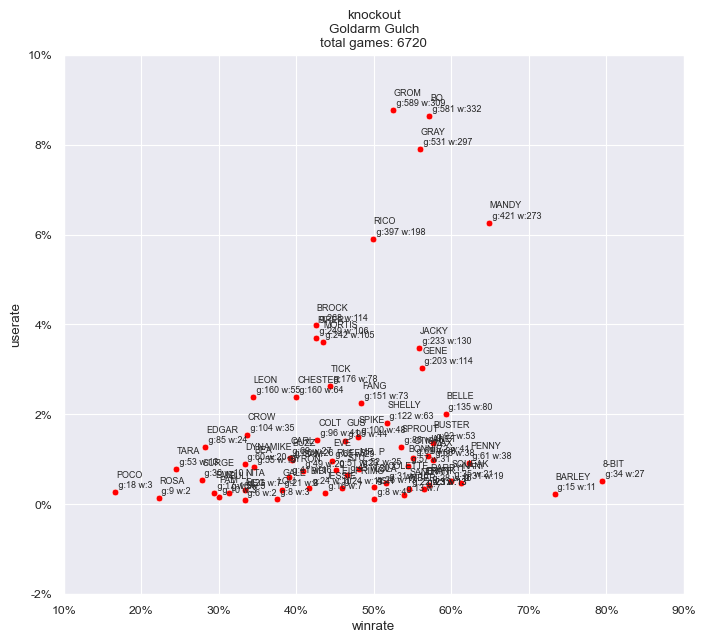

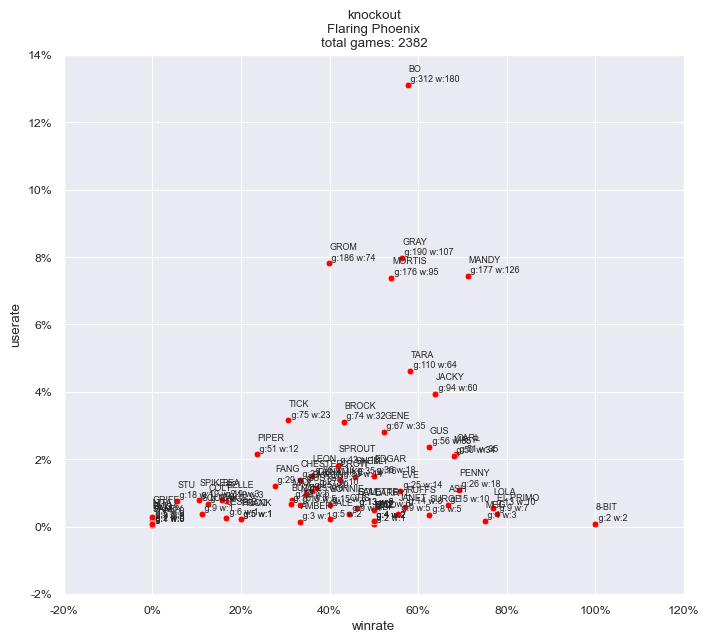

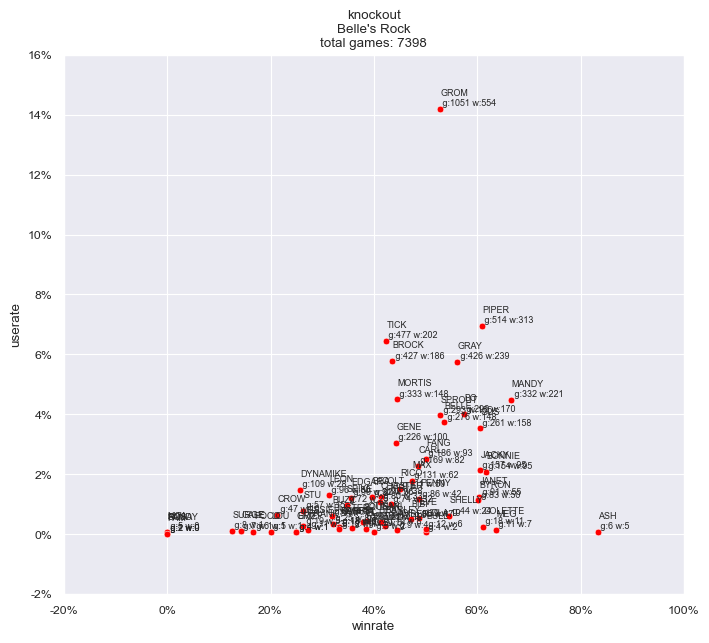

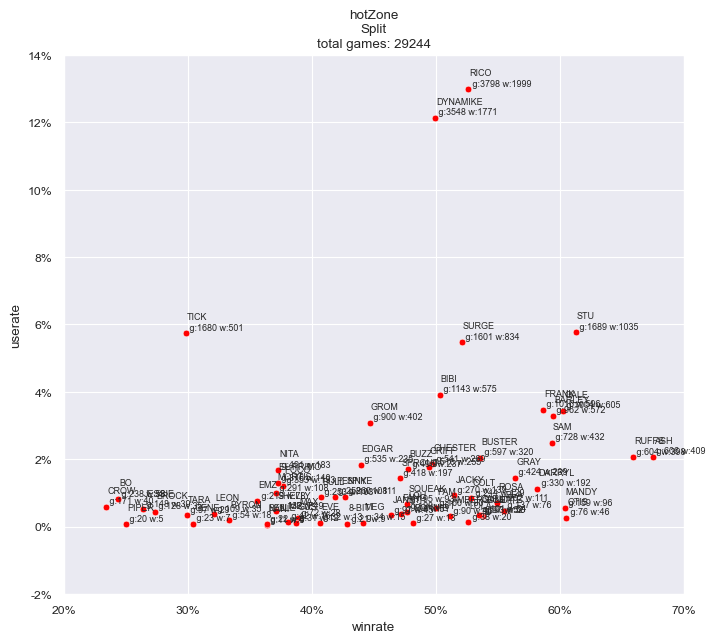

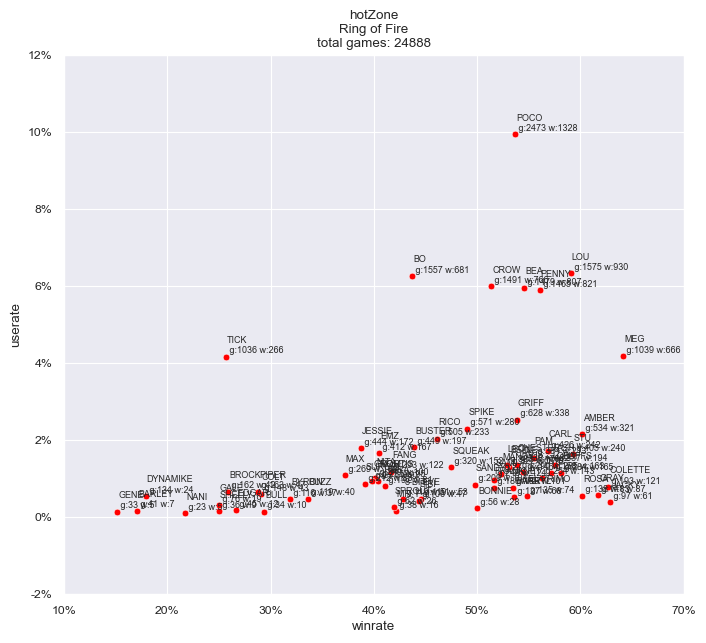

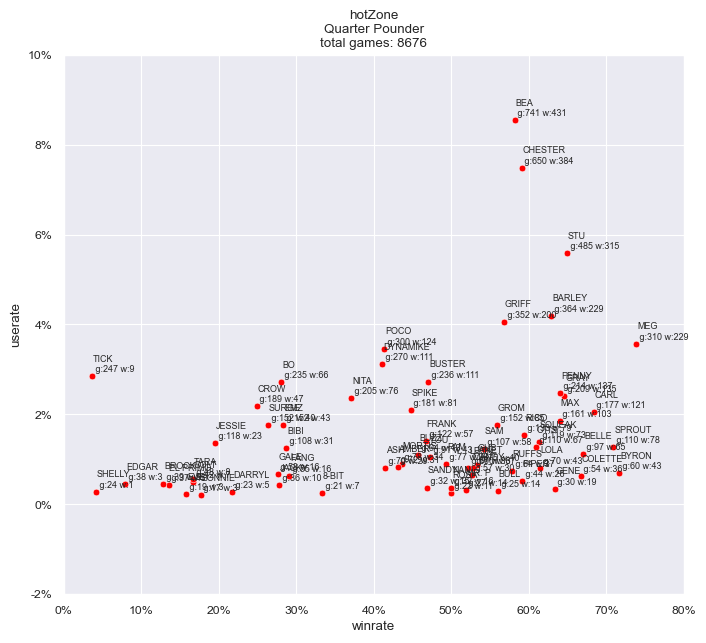

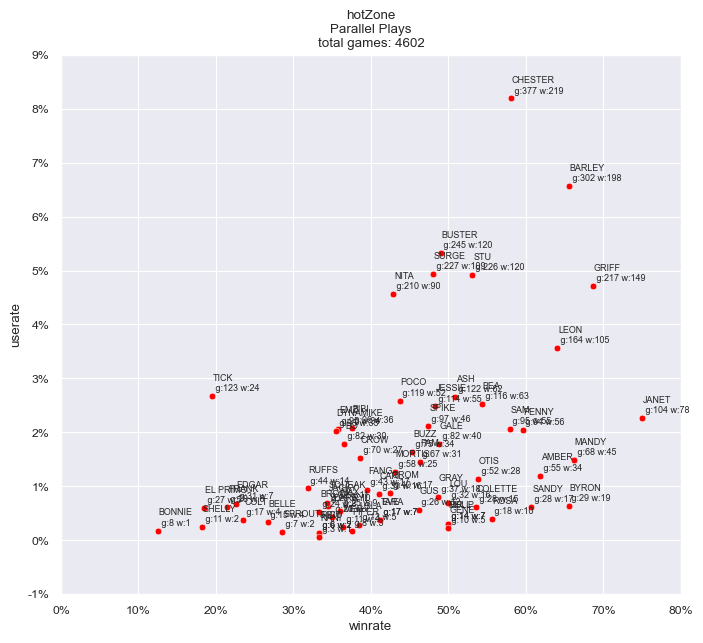

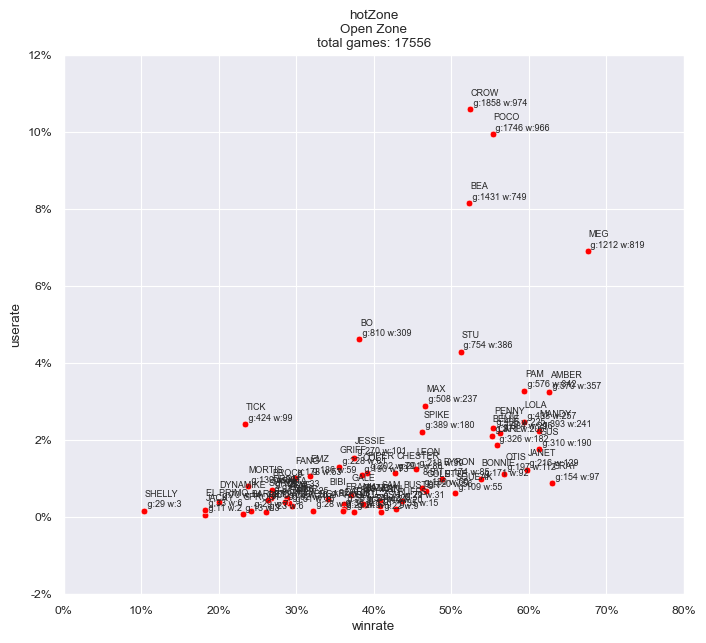

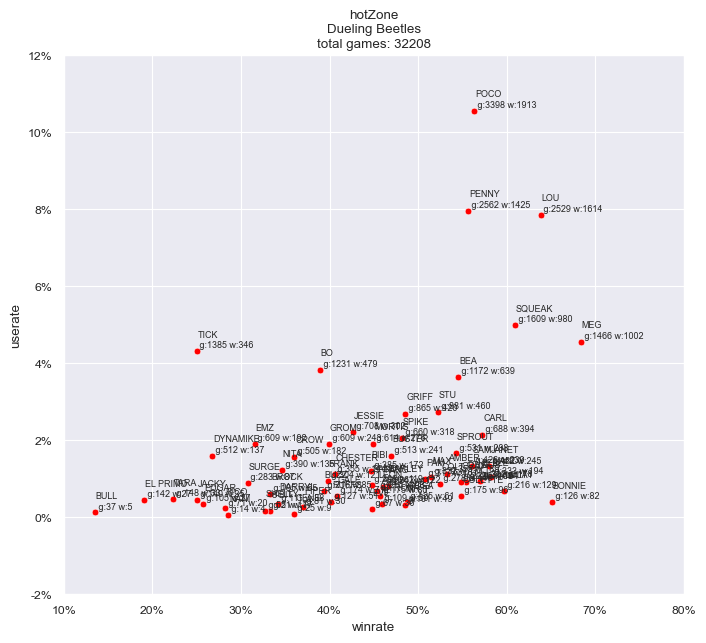

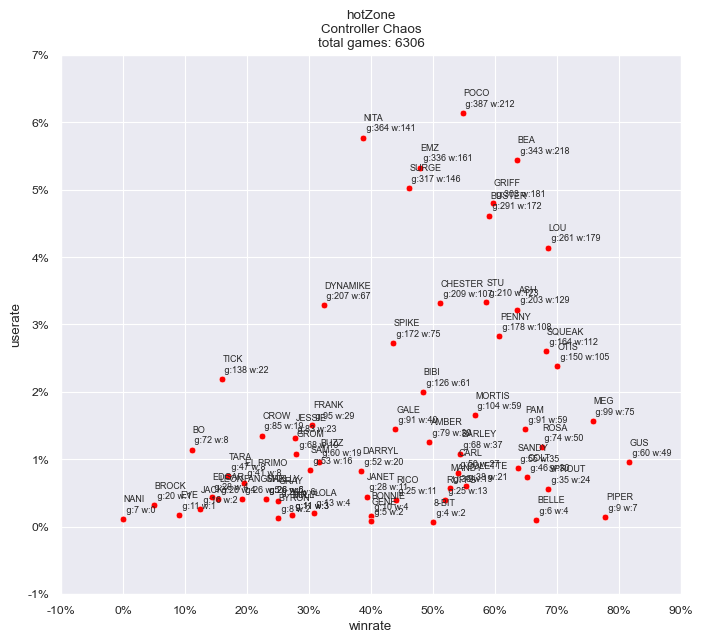

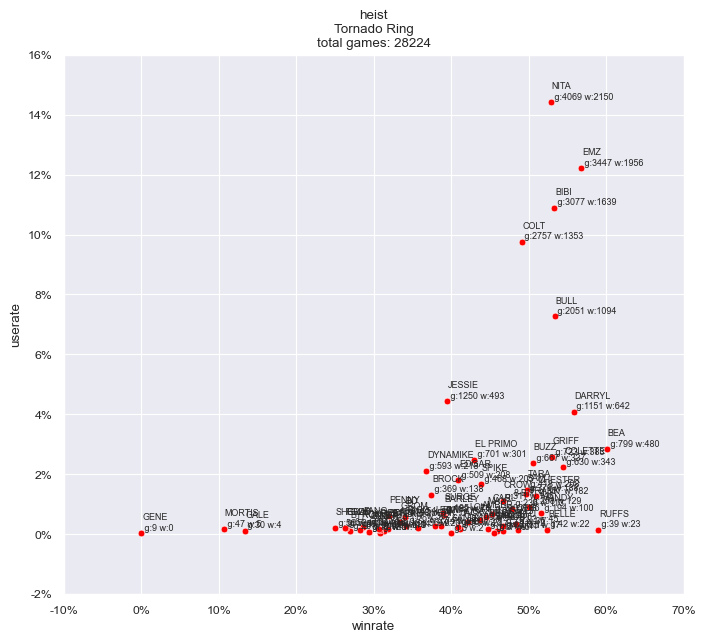

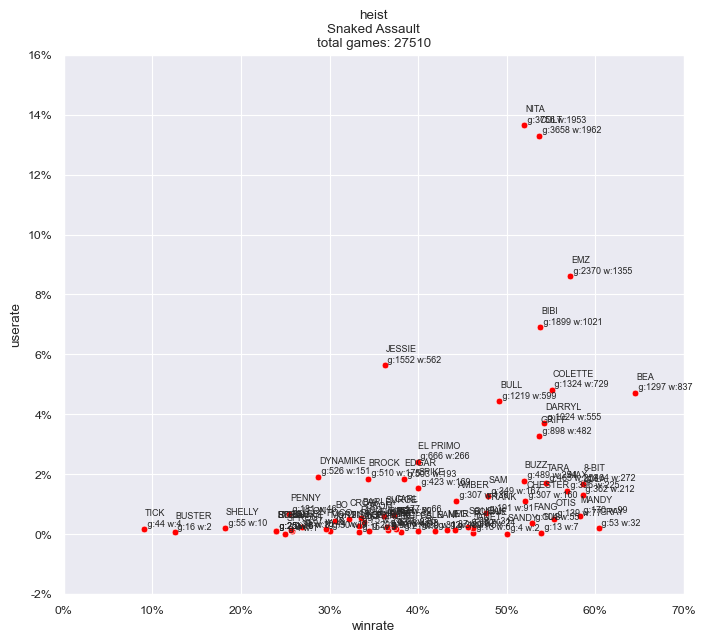

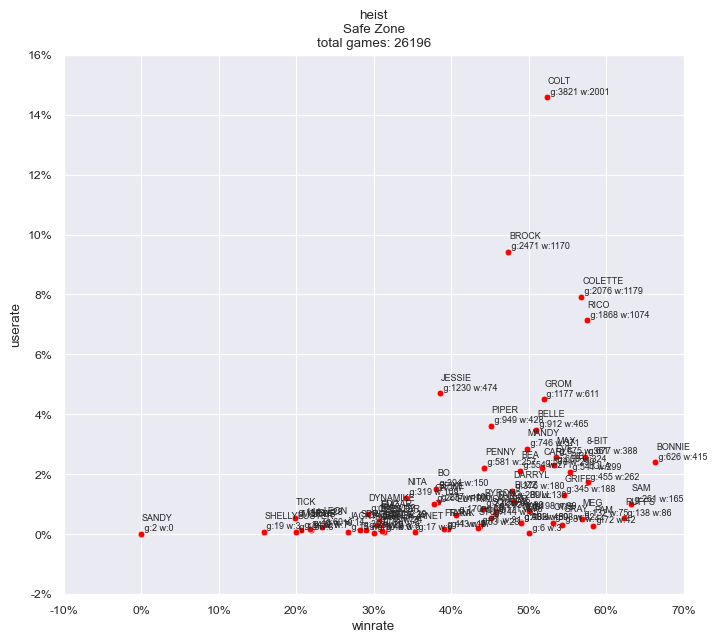

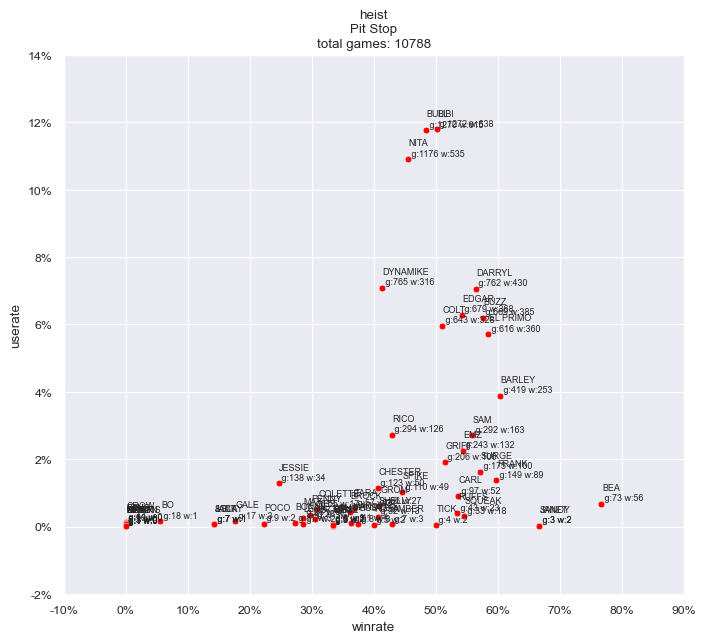

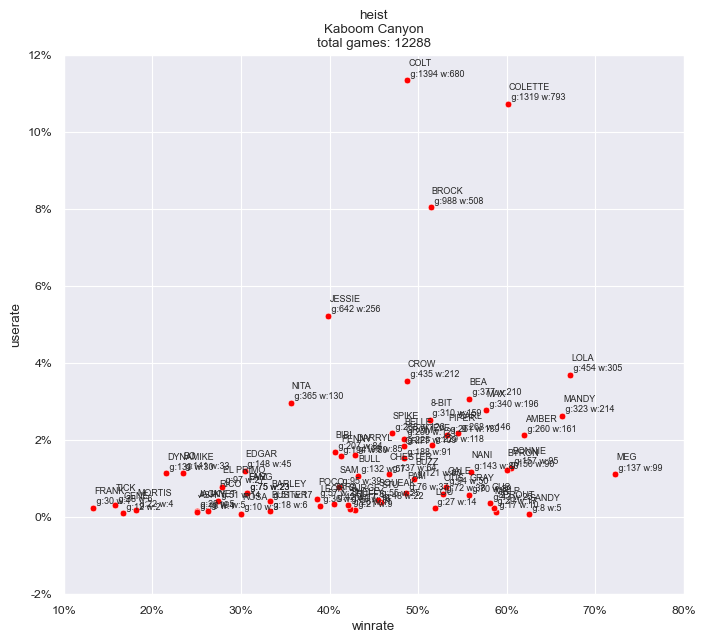

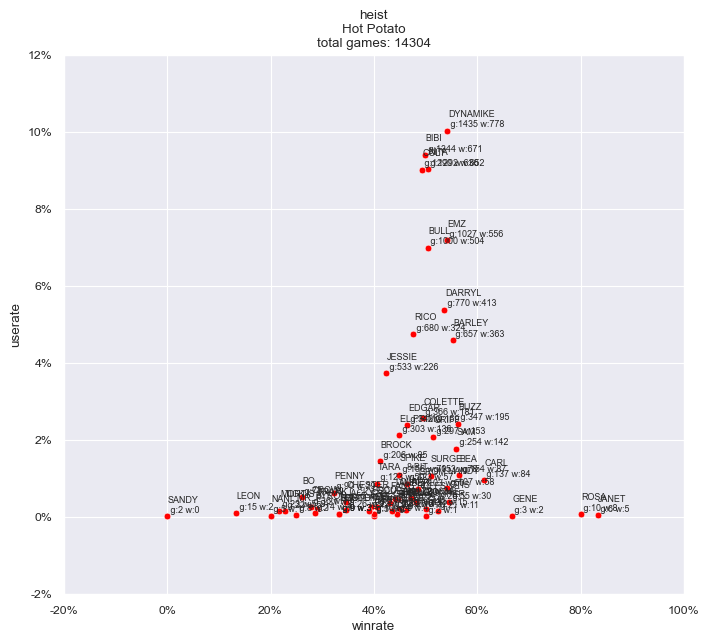

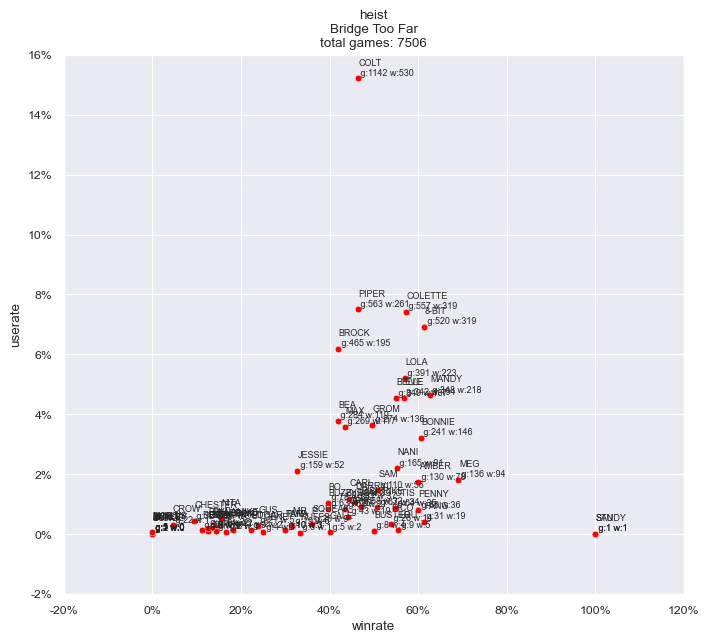

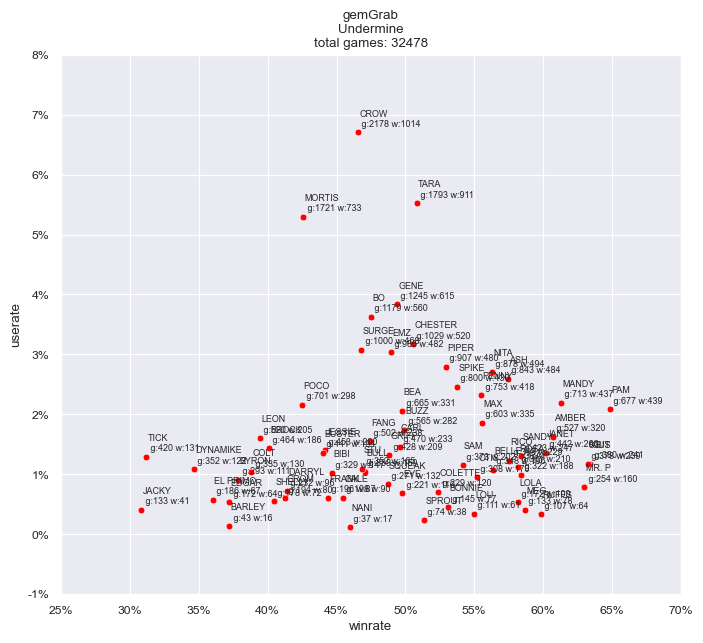

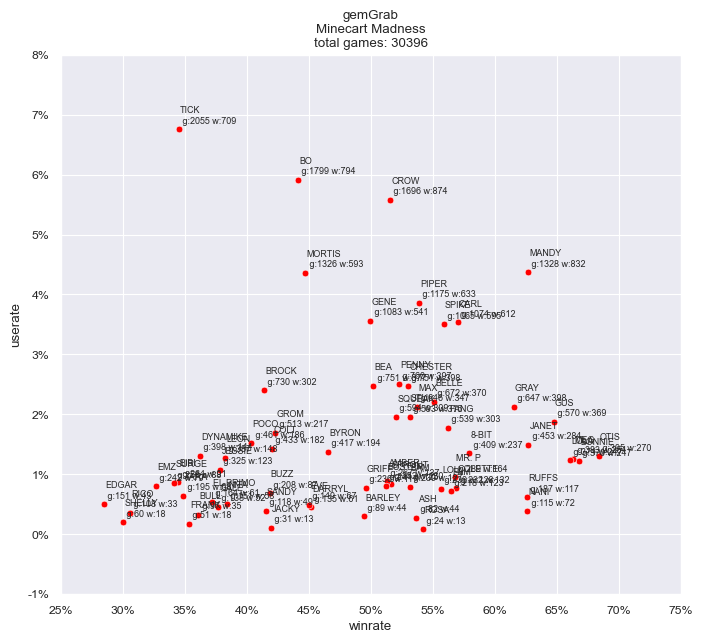

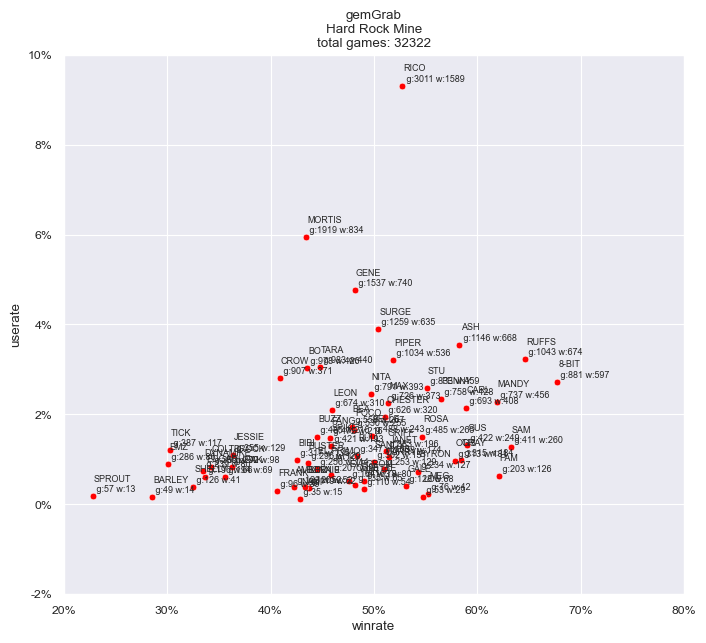

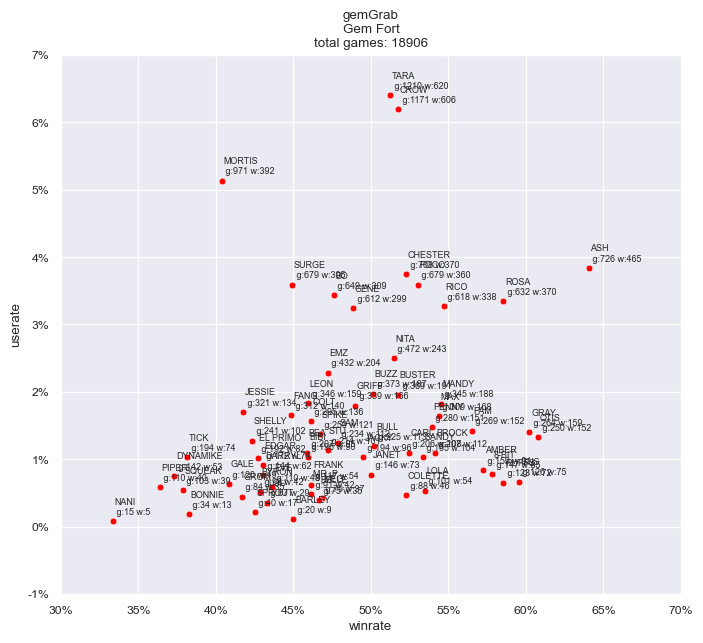

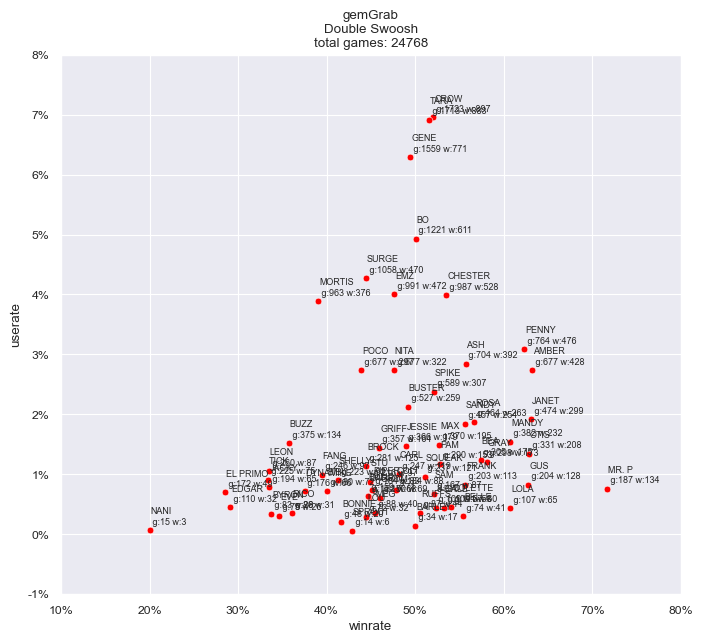

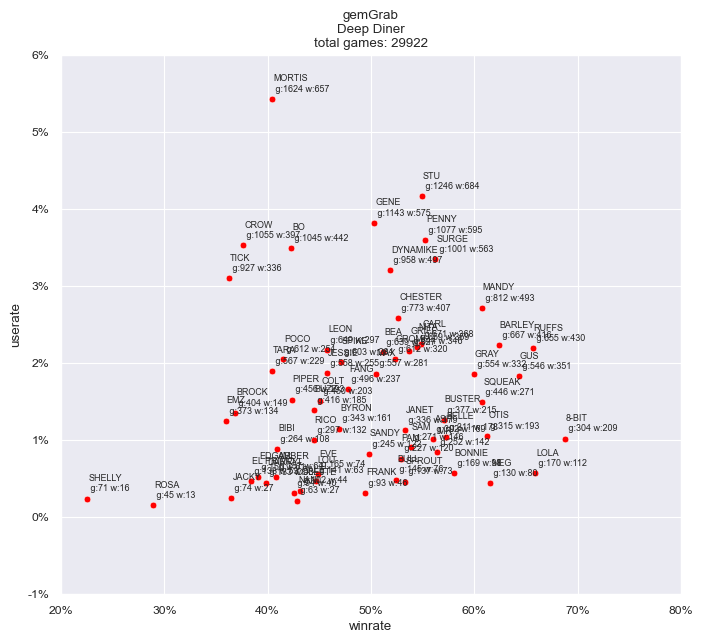

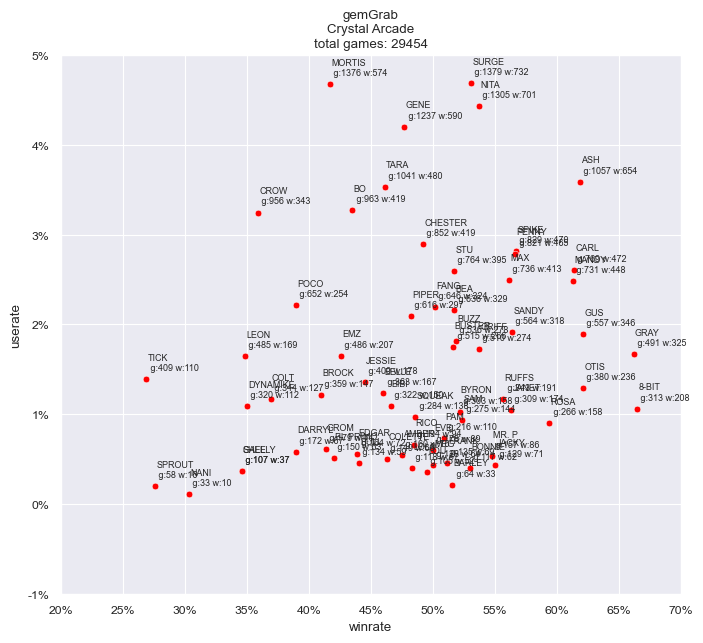

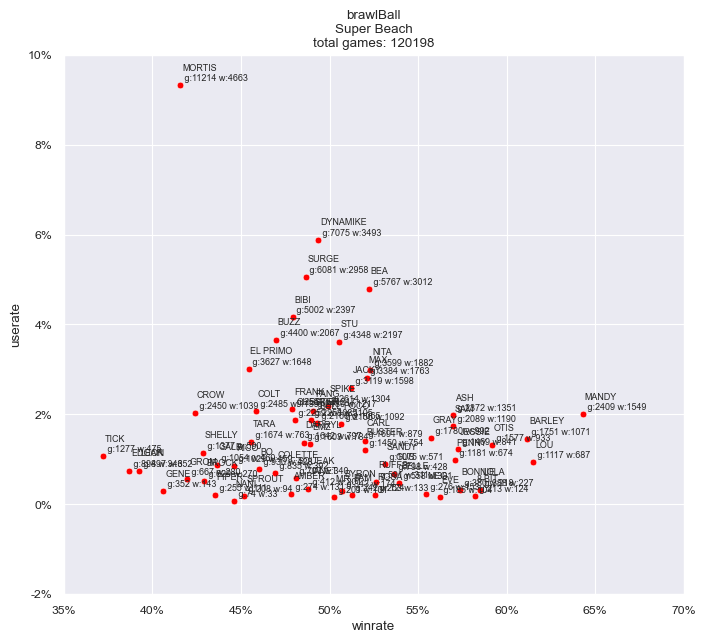

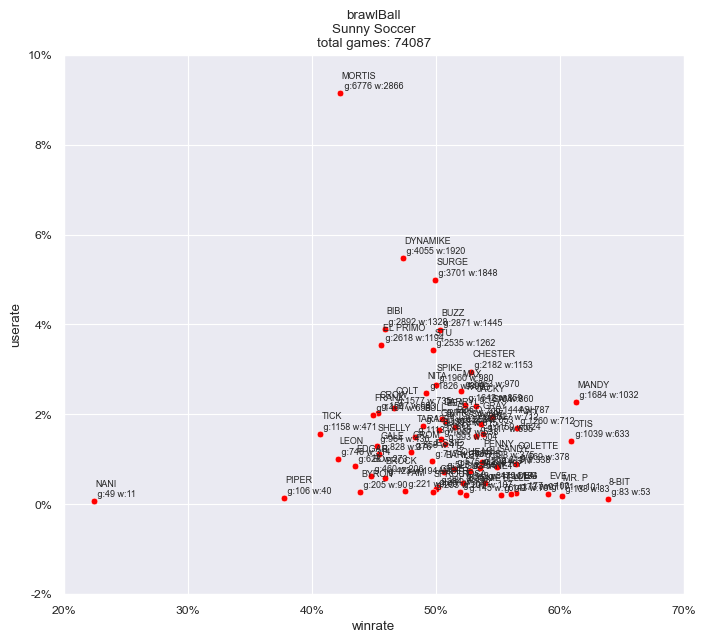

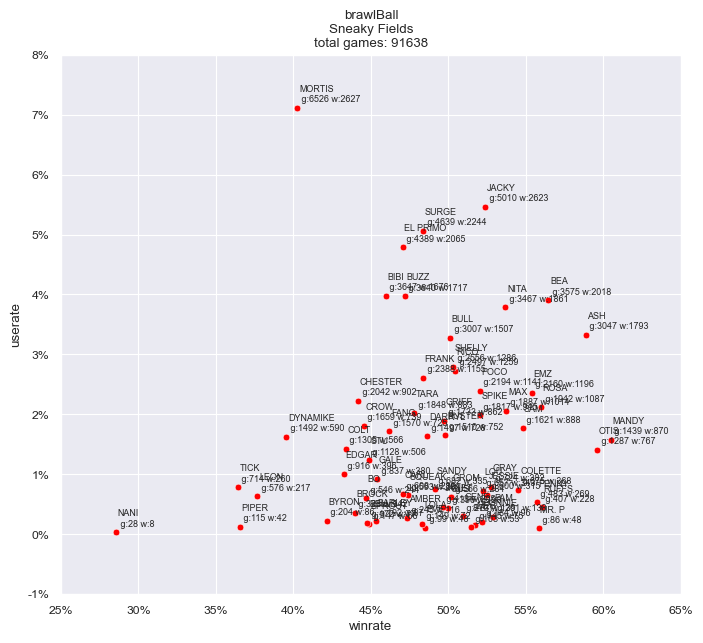

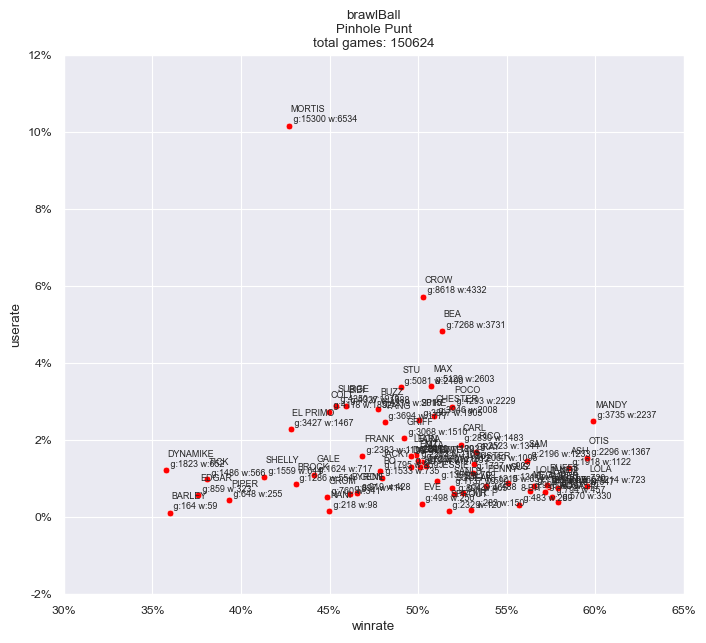

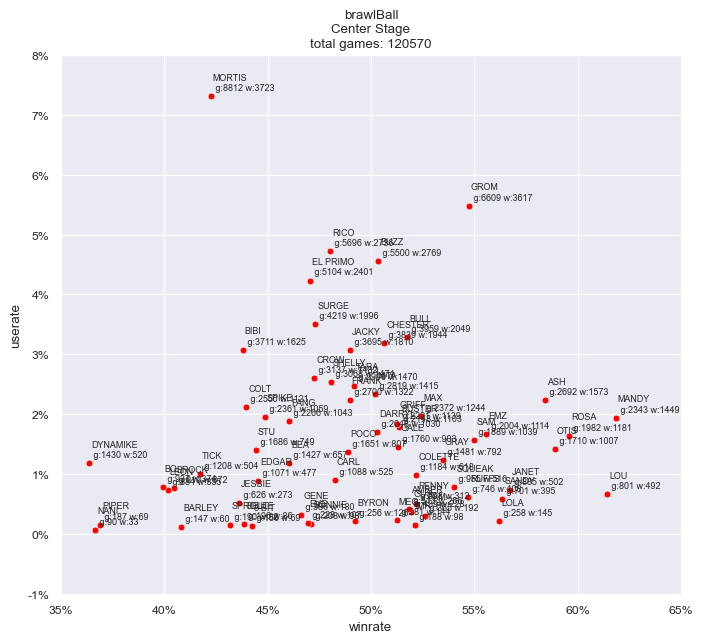

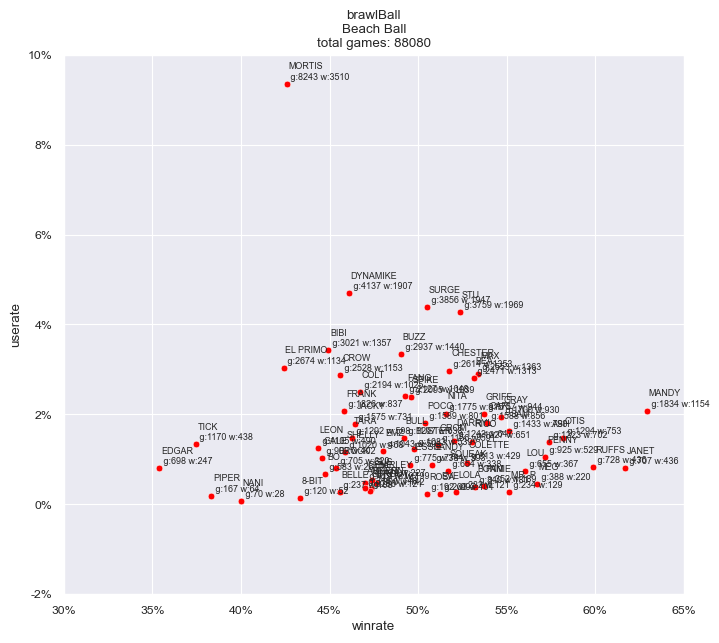

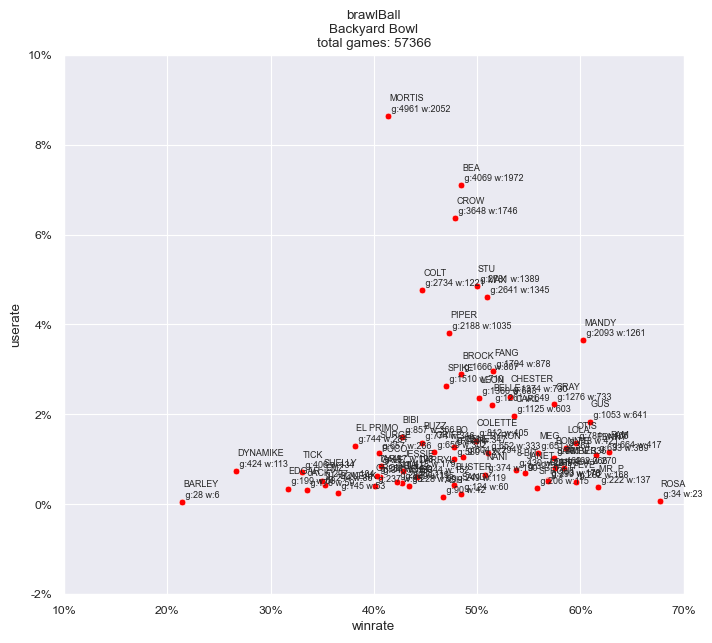

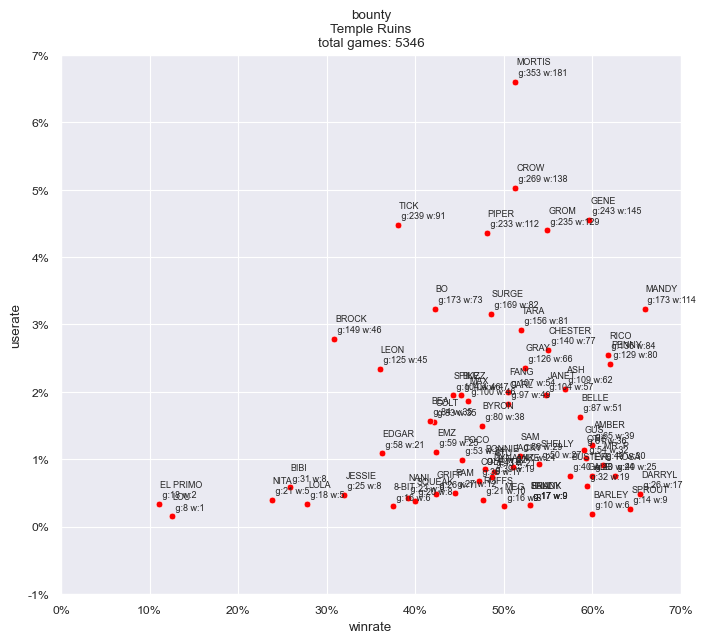

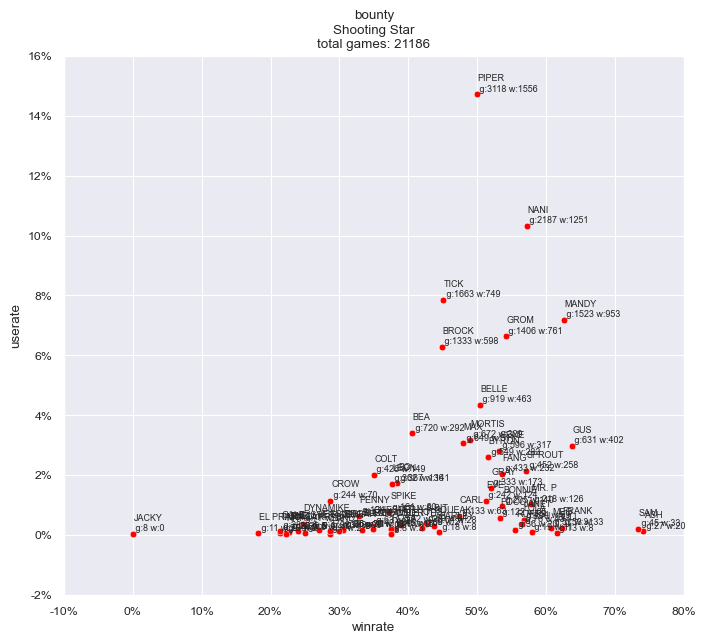

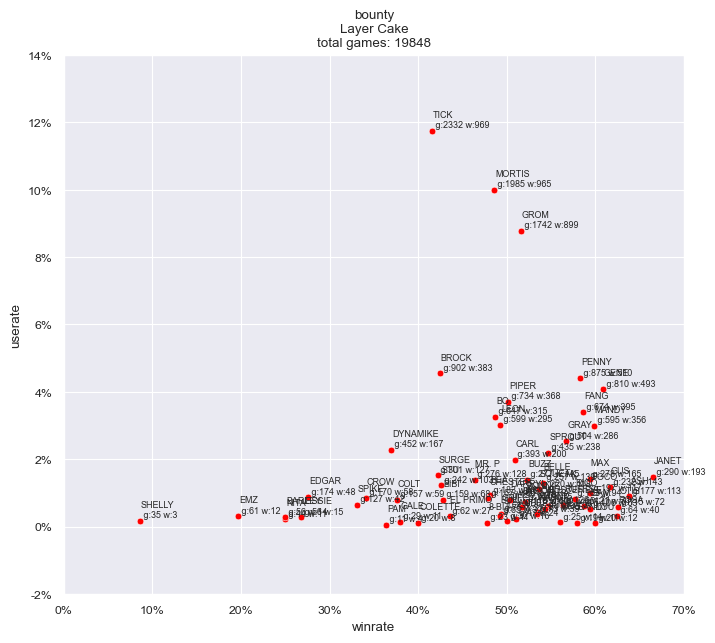

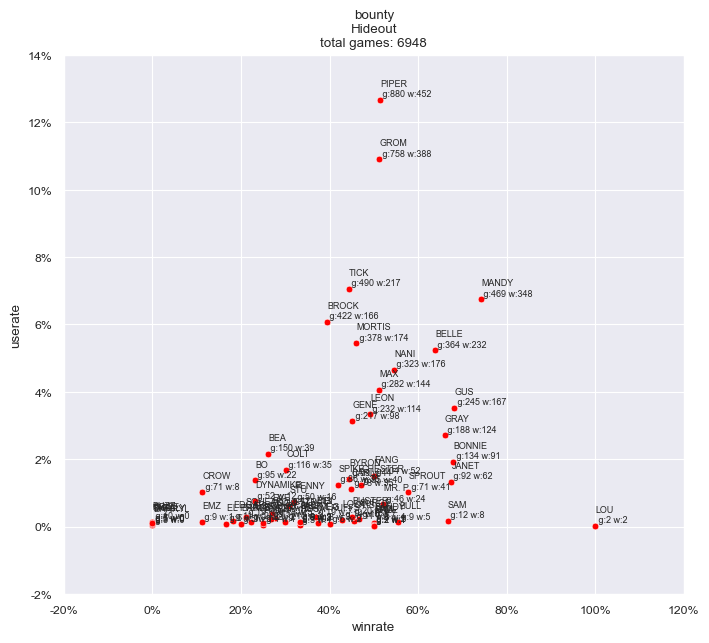

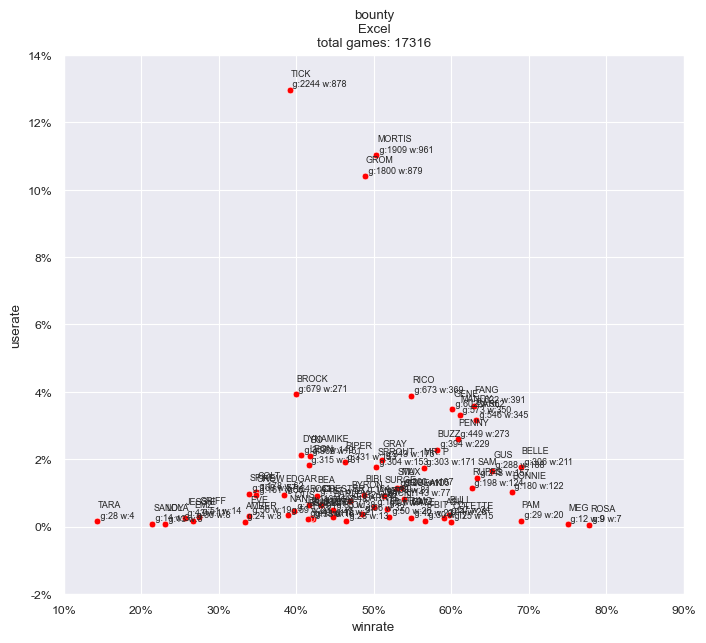

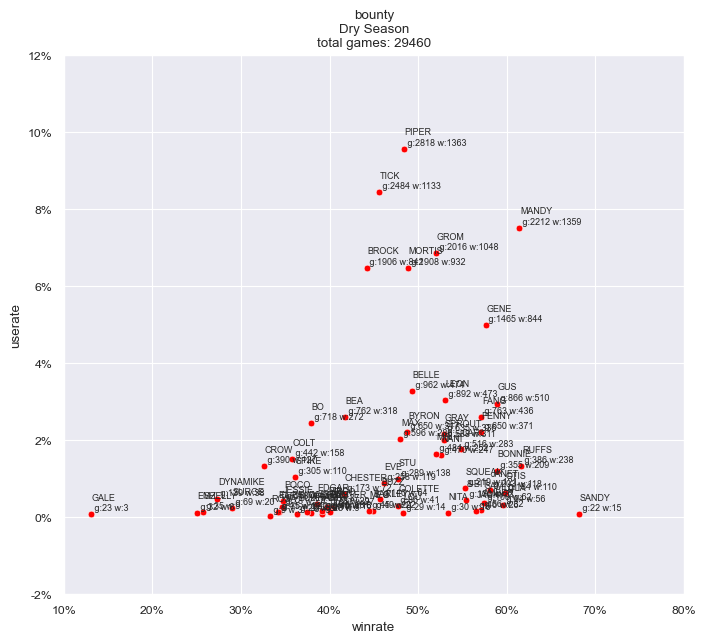

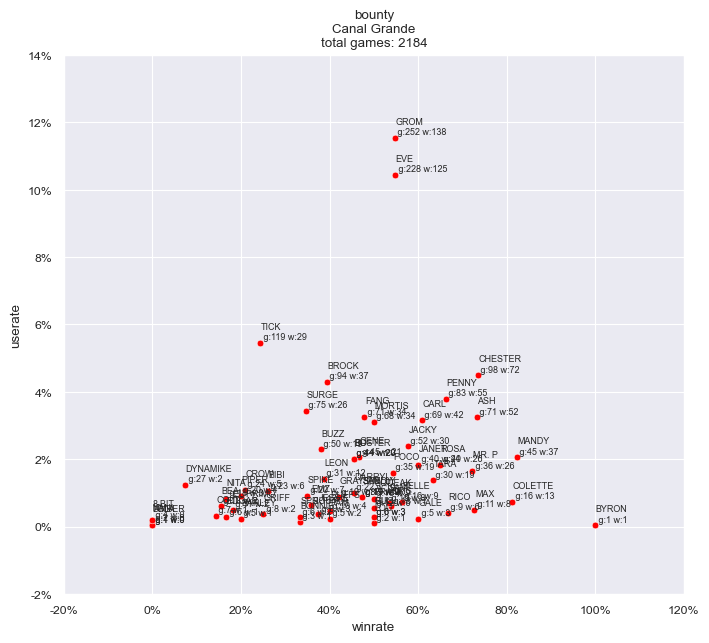

In [58]:
# winrate / userate

gamemodes = pivot_brawler['event.mode'].drop_duplicates().tolist()

for j, gm in enumerate(gamemodes):

	maps = pivot_brawler['event.map'][pivot_brawler['event.mode'] == gm].drop_duplicates().tolist()

	for i, map in enumerate(maps):
		data = dist_gamemode_map(gm, map)

		fig, ax = plt.subplots(figsize=(8,7))

		sns.scatterplot(
			data=data
			,x="winrate"
			,y="userate"
			,c="red"
			,ax=ax
		)

		# Añadir etiquetas flotando sobre los puntos
		for i, point in data.iterrows():
			ax.text(point.winrate + 0.001, point.userate + 0.001, point.brawlername + '\n g:' + str(point.total_games) + ' w:' + str(point.y), fontsize=6.5)

		yticks = ax.get_yticks()
		xticks = ax.get_xticks()

		ax.set_yticks(yticks)
		ax.set_xticks(xticks)

		ax.set_yticklabels(["{:,.00%}".format(y) for y in yticks])
		ax.set_xticklabels(["{:,.00%}".format(x) for x in xticks])

		plt.title(gm + '\n' + map + '\n' + 'total games: ' + str(data['total_games_map'][0]))

		plt.savefig('plots/gamemode_map/' + gm + '_' + map + '.png', dpi=300, bbox_inches='tight')

		plt.show()

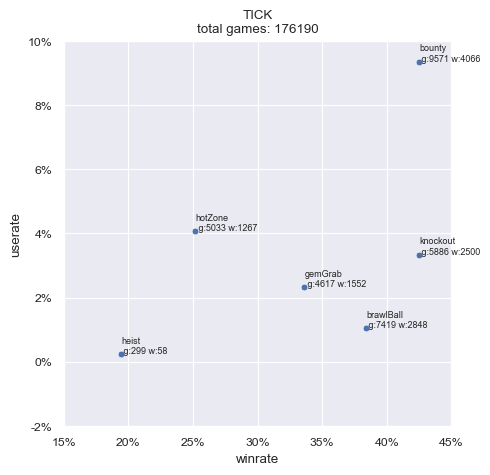

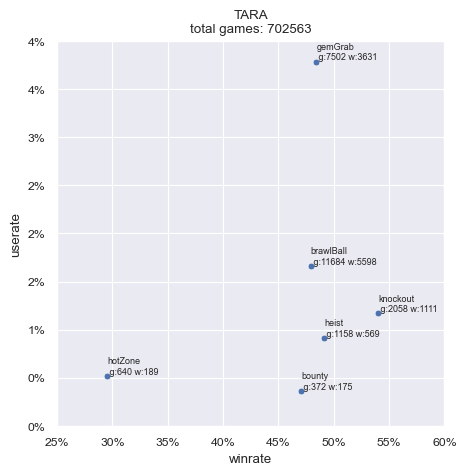

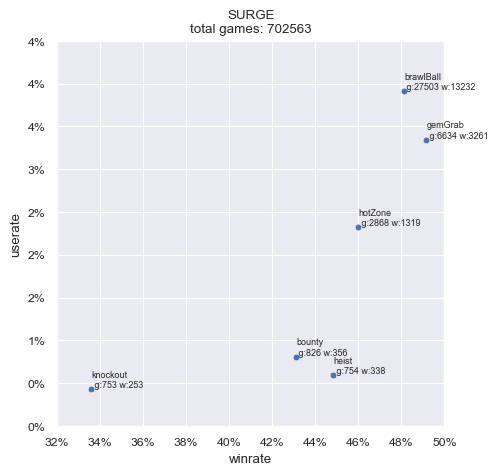

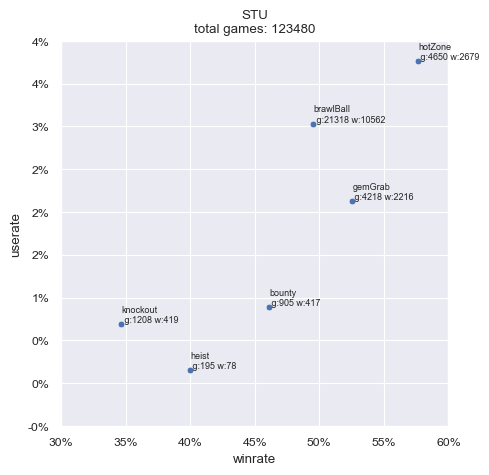

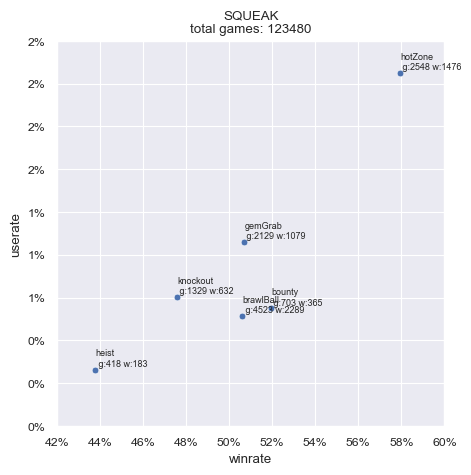

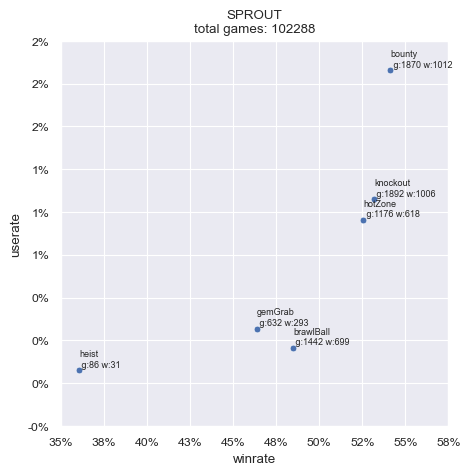

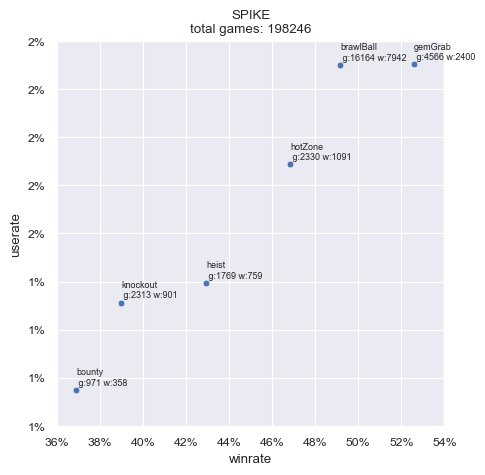

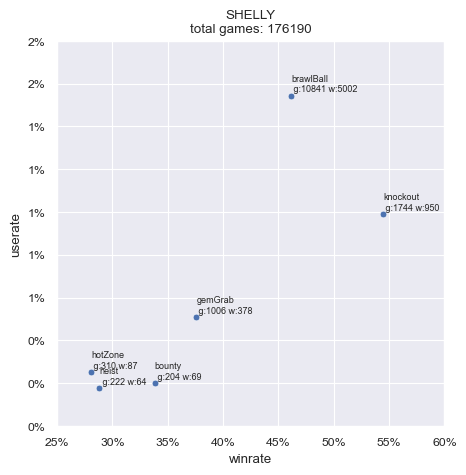

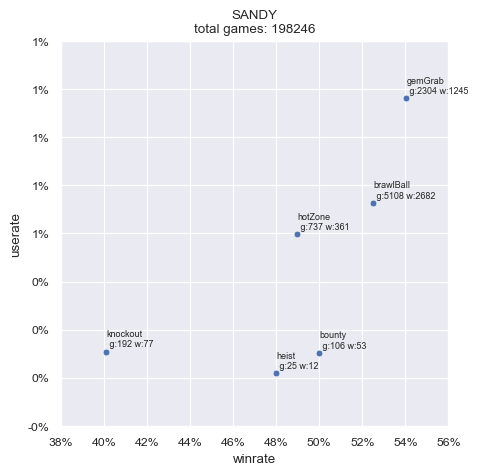

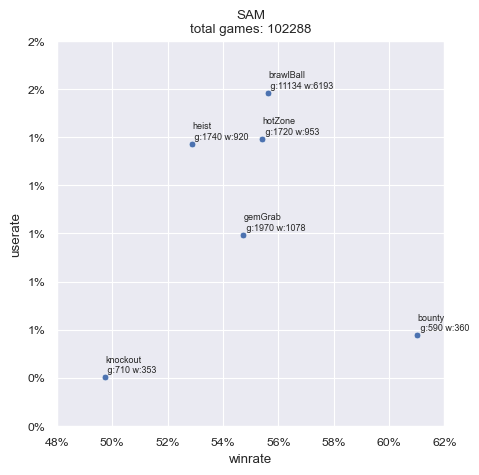

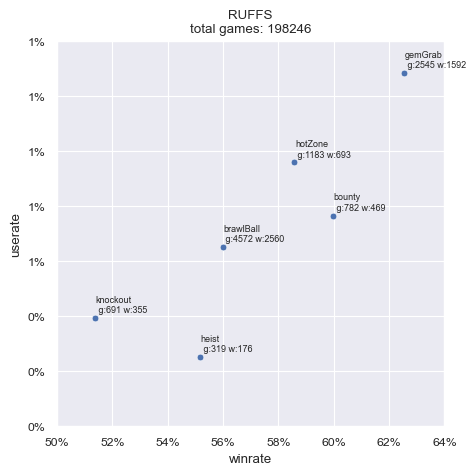

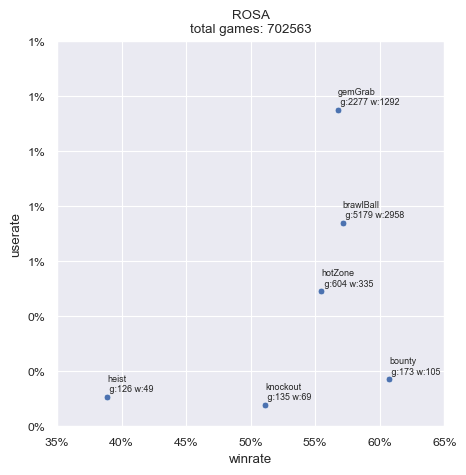

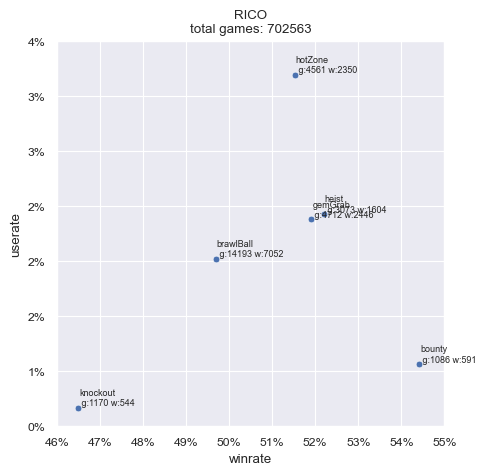

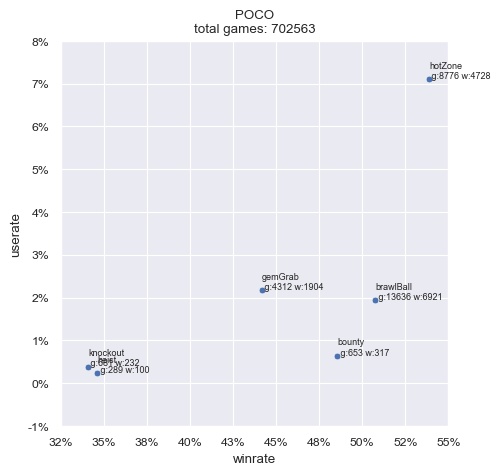

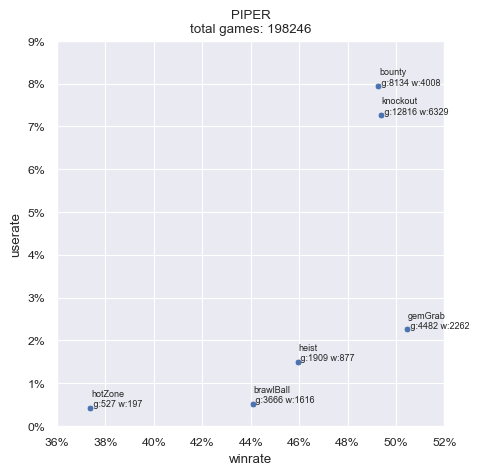

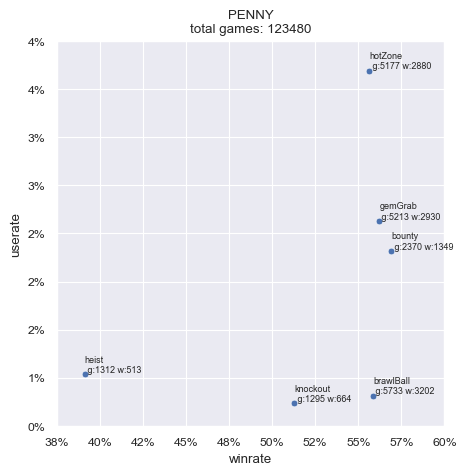

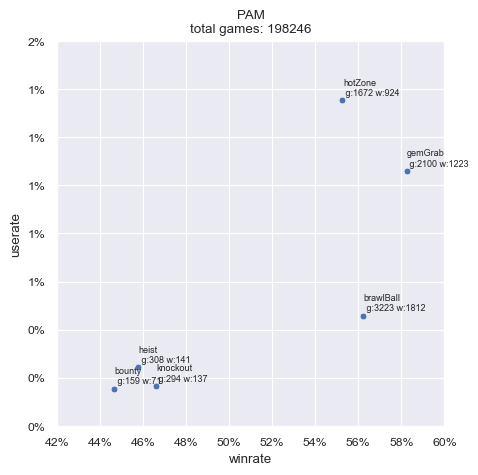

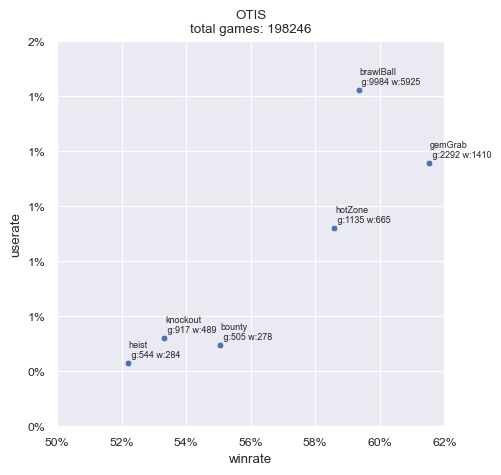

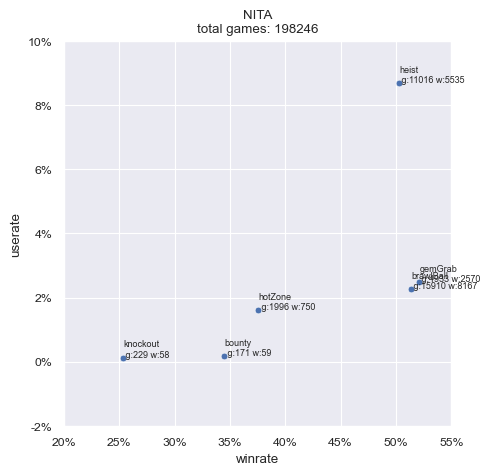

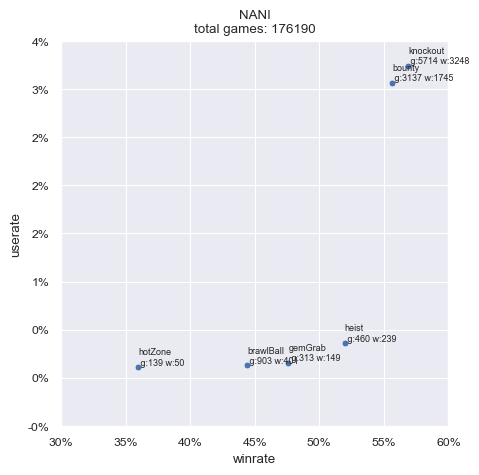

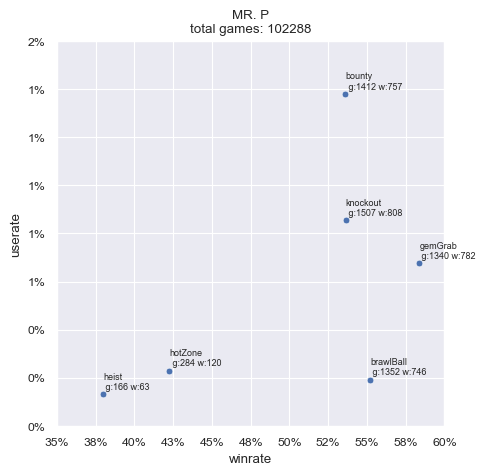

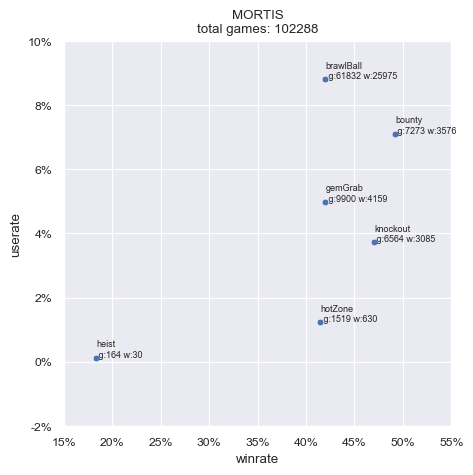

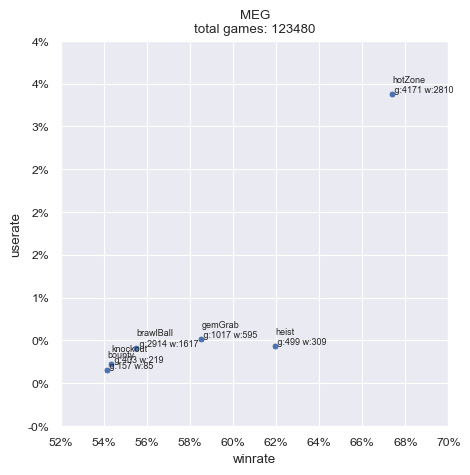

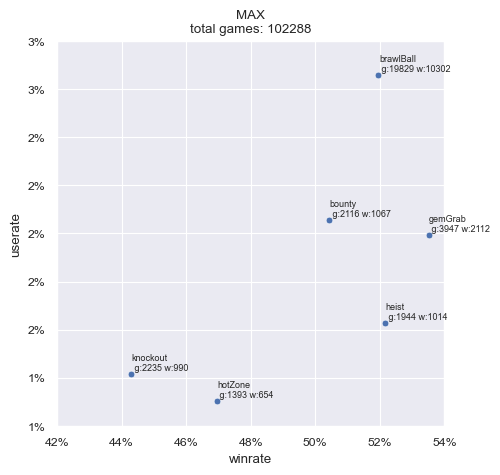

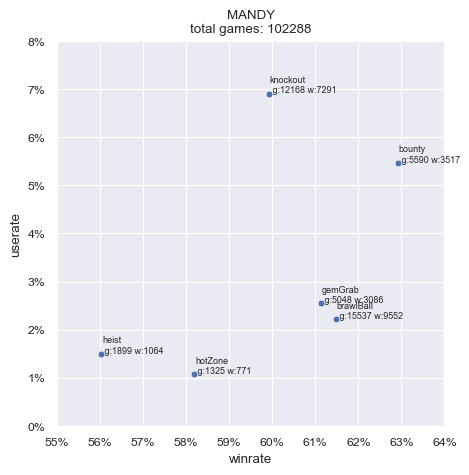

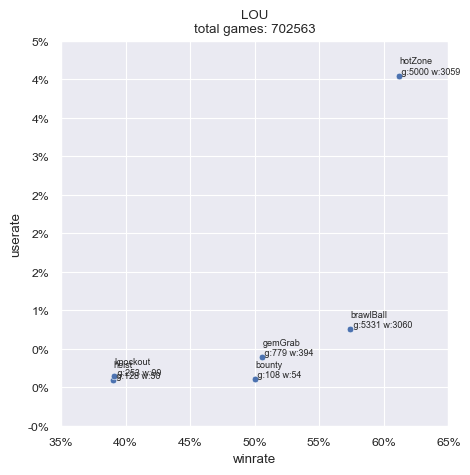

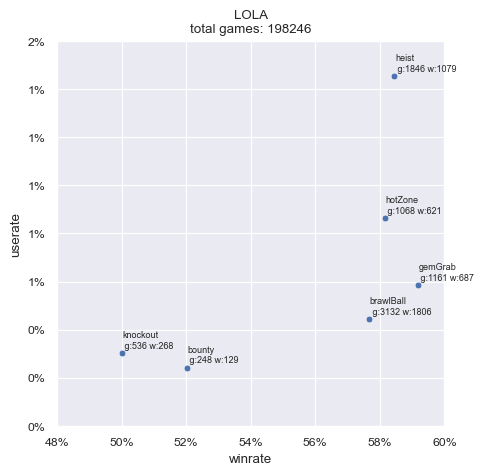

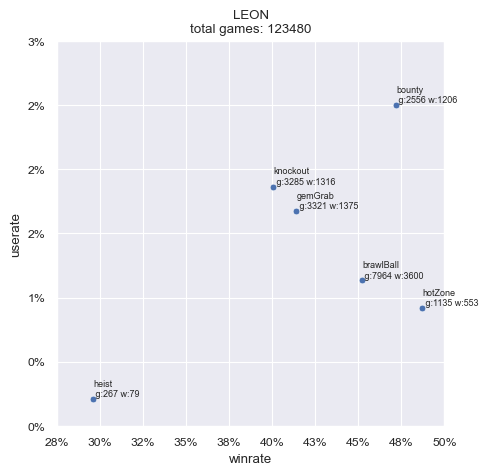

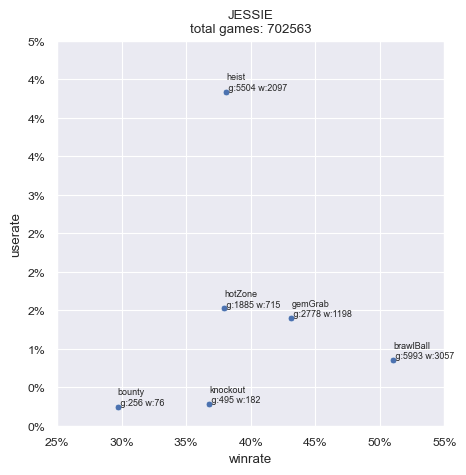

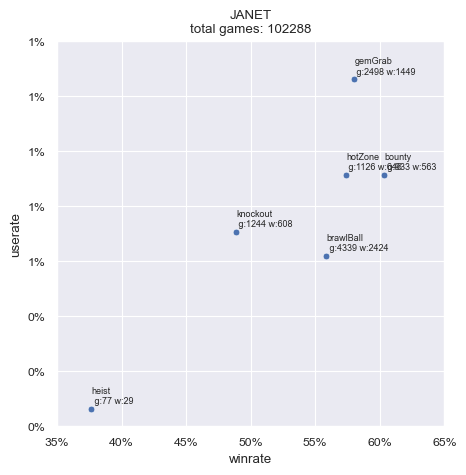

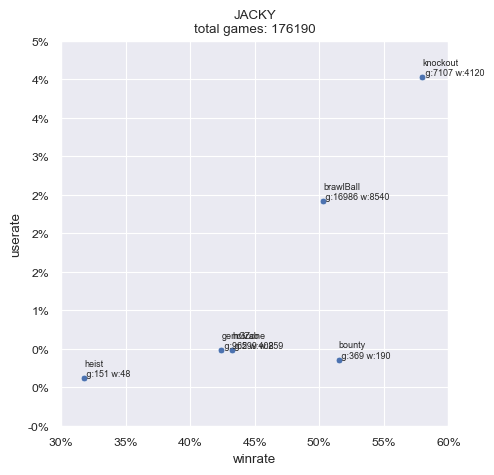

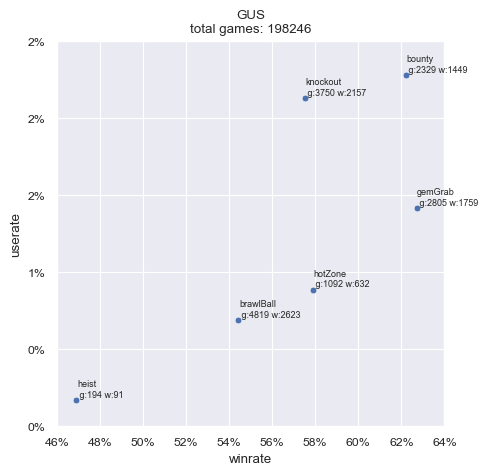

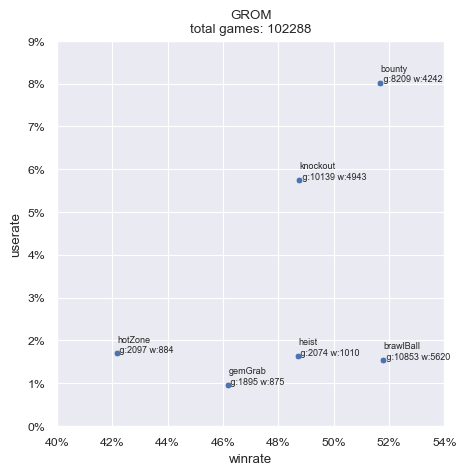

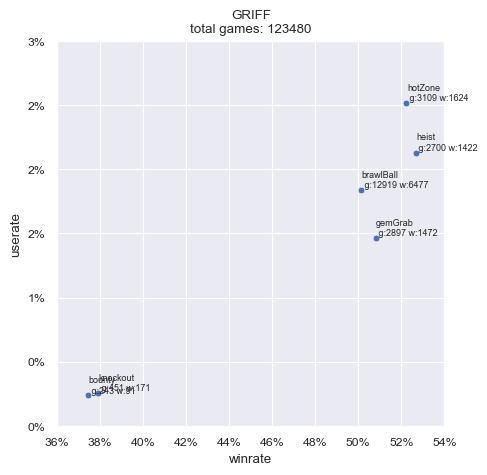

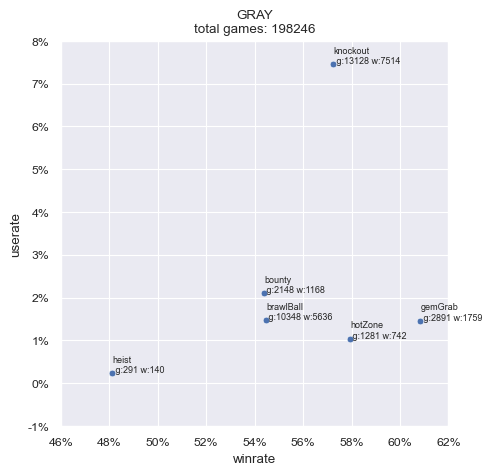

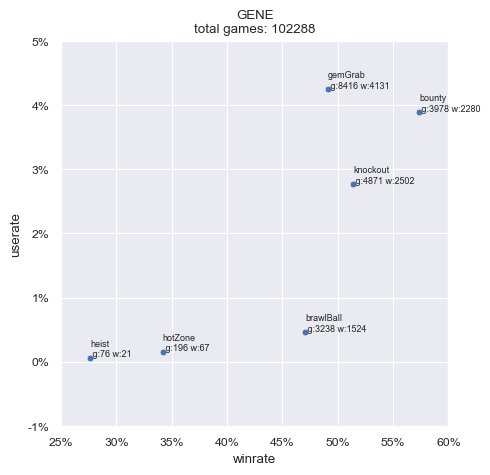

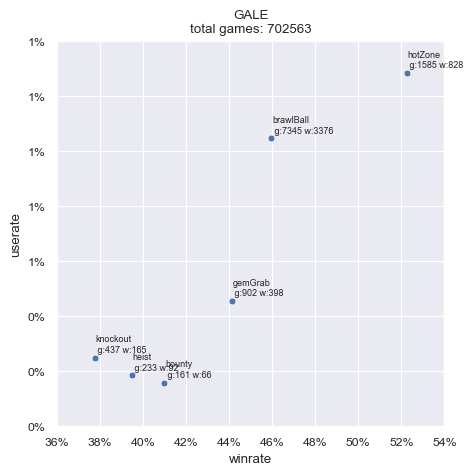

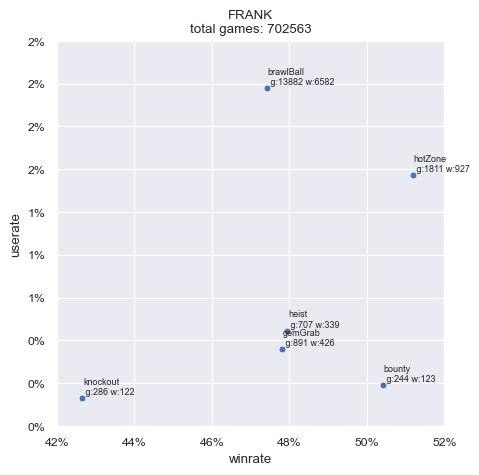

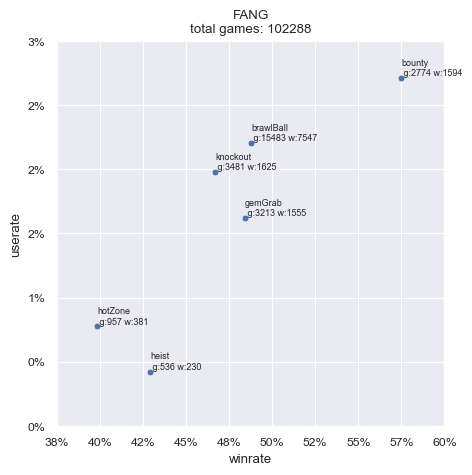

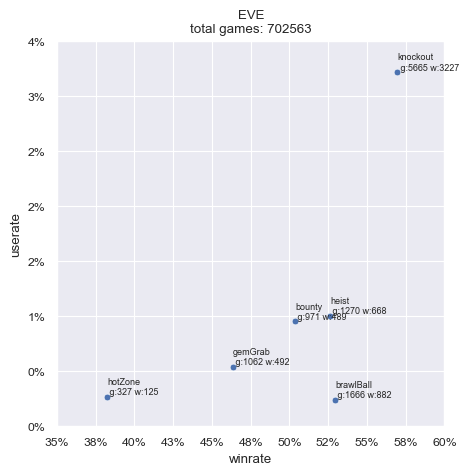

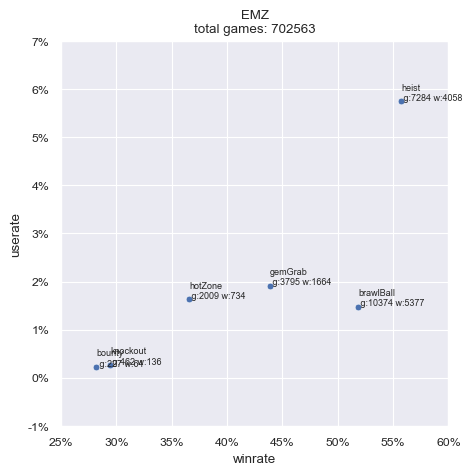

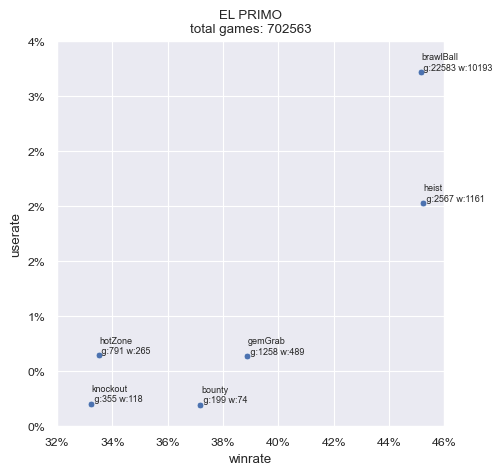

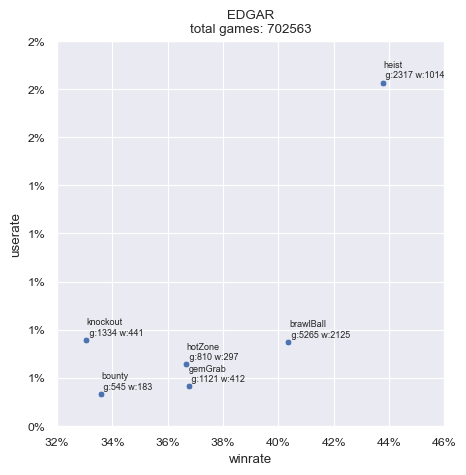

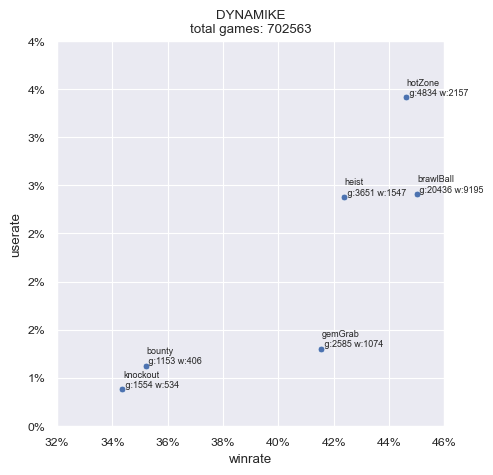

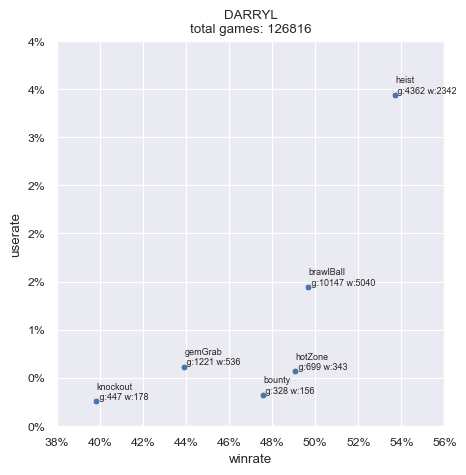

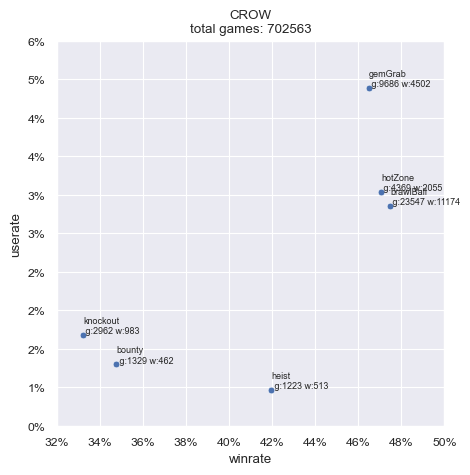

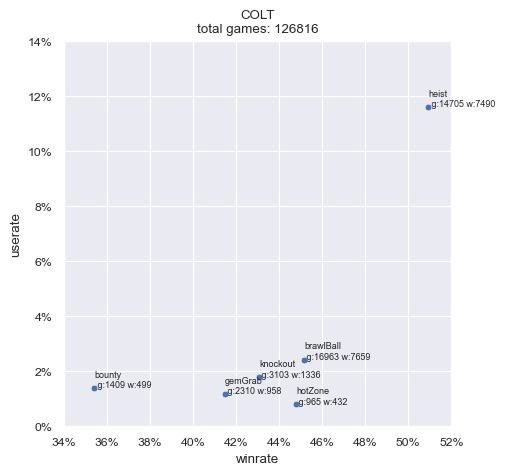

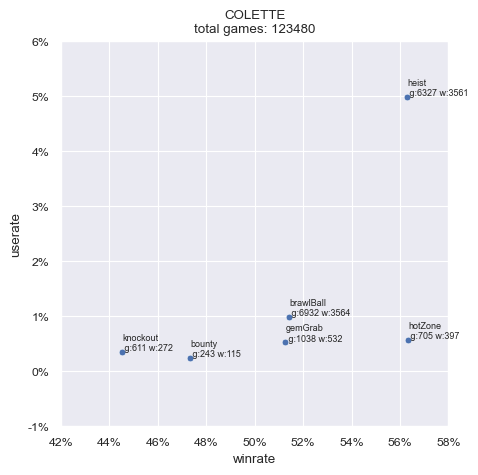

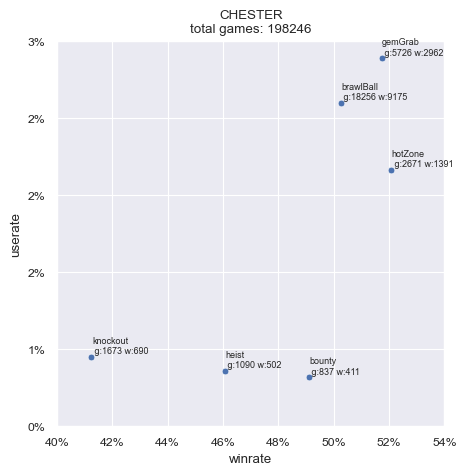

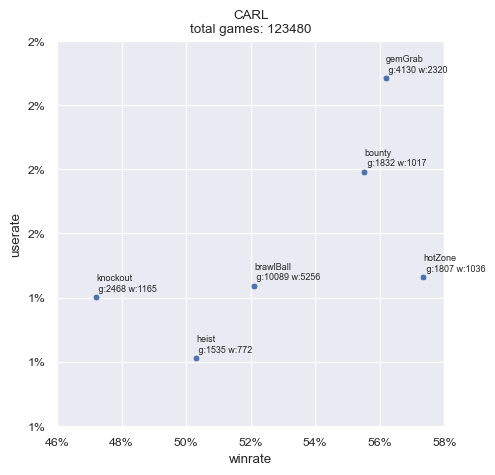

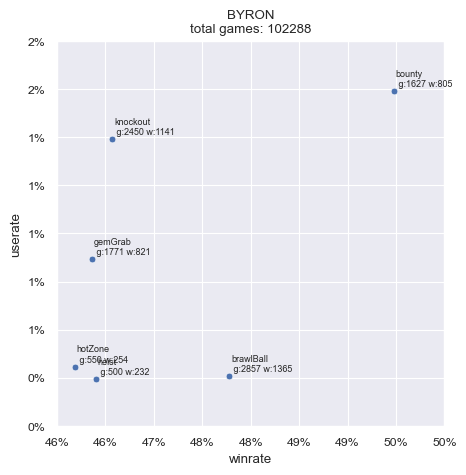

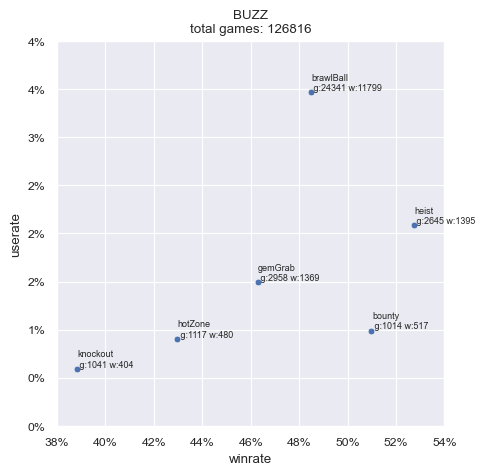

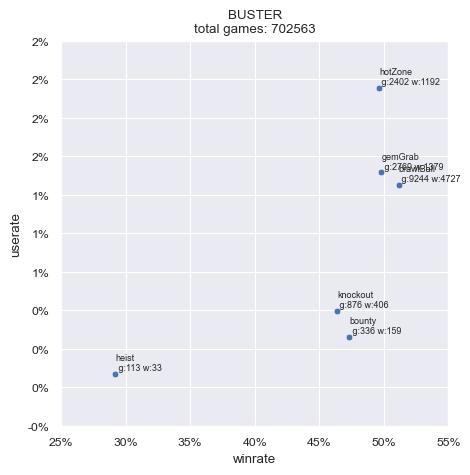

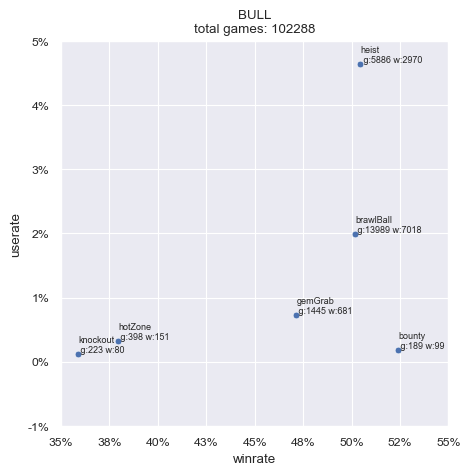

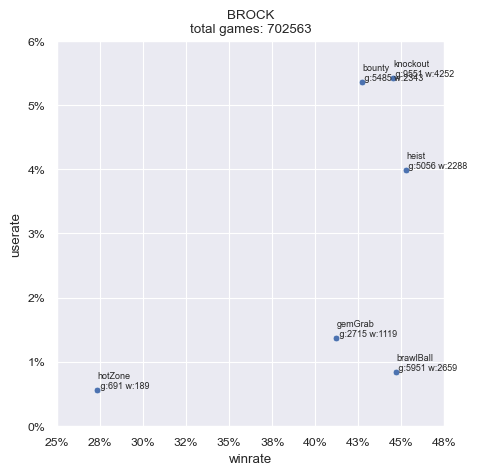

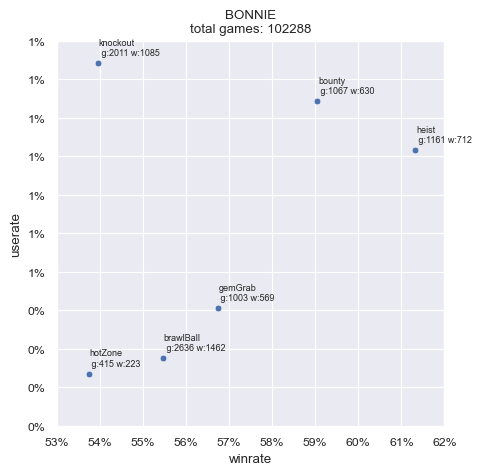

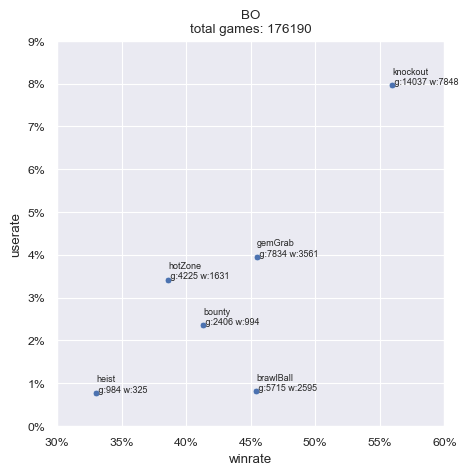

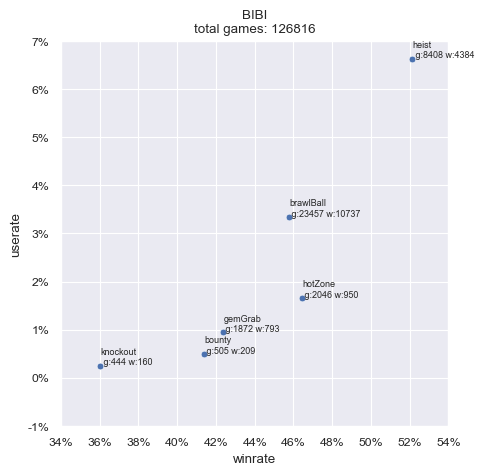

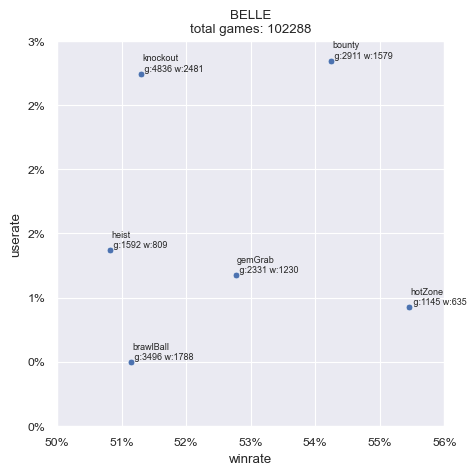

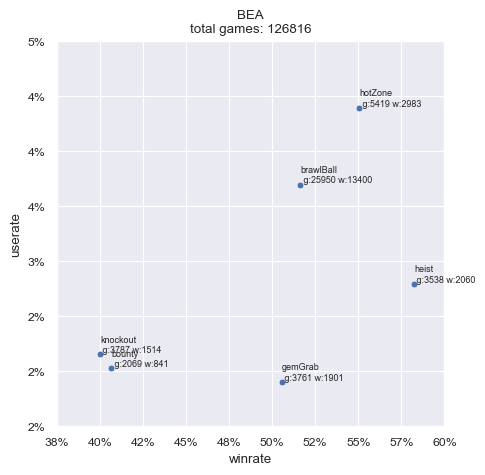

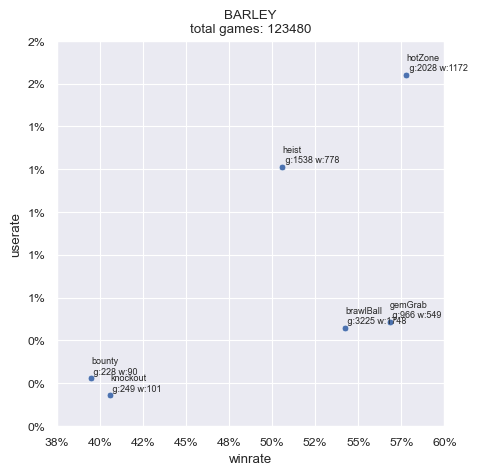

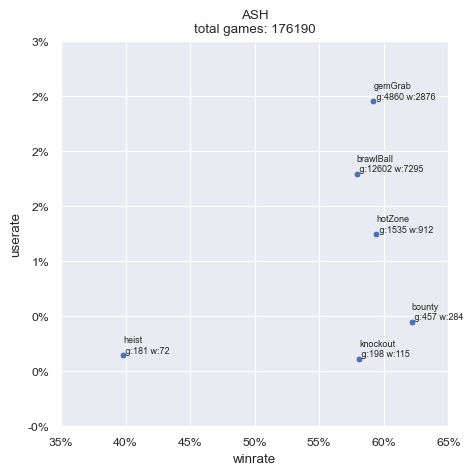

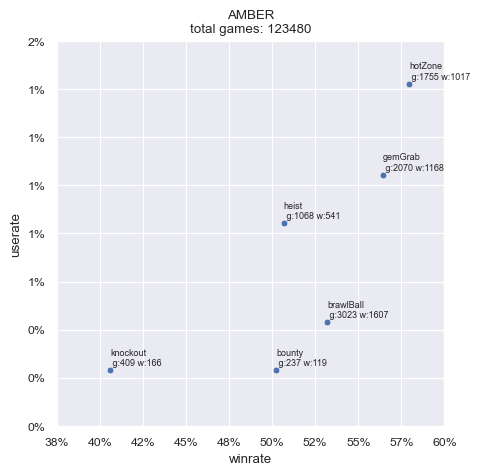

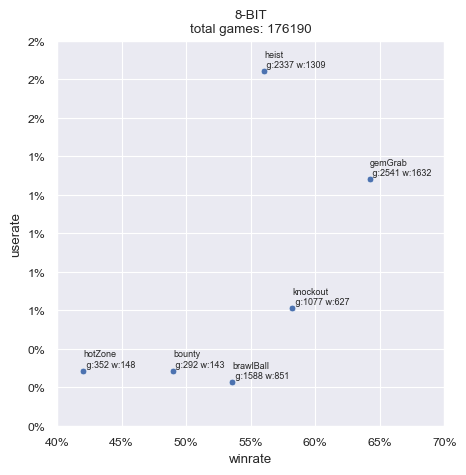

In [60]:
# winrate / userate by brawler

brawlers = pivot_brawler['brawlername'].drop_duplicates().tolist()

for j, br in enumerate(brawlers):

	data = dist_brawler(br)

	fig, ax = plt.subplots(figsize=(5,5))

	sns.scatterplot(
		data=data
		,x="winrate"
		,y="userate"
		,ax=ax
	)

	# Añadir etiquetas flotando sobre los puntos
	for i, point in data.iterrows():
		ax.text(point.winrate + 0.0002, point.userate + 0.0002, point[0] + '\n g:' + str(point.total_games) + ' w:' + str(point.y), fontsize=6.5)

	yticks = ax.get_yticks()
	xticks = ax.get_xticks()

	ax.set_yticks(yticks)
	ax.set_xticks(xticks)

	ax.set_yticklabels(["{:,.00%}".format(y) for y in yticks])
	ax.set_xticklabels(["{:,.00%}".format(x) for x in xticks])

	plt.title(br + '\n' + 'total games: ' + str(data['total_games_map'][0]))

	plt.savefig('plots/brawler/' + br + '.png', dpi=300, bbox_inches='tight')

	plt.show()